# Module 1 Project
- **Student name**: John Nguyen
- **Student pace**: Self Paced
- **Scheduled project review date/time**: TBD
- **Instructor name**: Jeff Herman
- **Blog post URL**: TBD

### Introduction

In this project, we are going to examine the King County dataset.  The dataset contains records for home sales during a particular period in King County (Figure 1).  King County is located in the state of Washington and contains the city of Seattle.  Each record contains information regarding the sale of a particular home.  

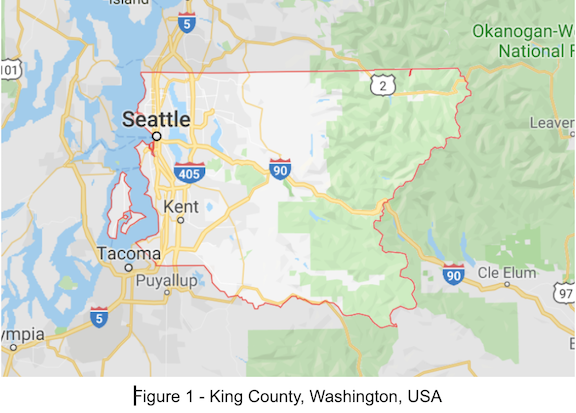

### Objective

Our study will involve cleaning, exploring, and modelling the dataset.  We will attempt to model the dataset with a multivariate linear regression to predict the sale prices of the homes. 

## Part 1: Import

We will begin by importing a variety of libraries to analyze the King County dataset.  We will use the **pandas** data analysis library to organize and clean the data.  The **matplotlib** and **seaborn** libraries will be used to visualize the data.  **Numpy** and **scipy** scientific computation libraries make it easier to operate on the data.  Multiple modules and packages from the **statsmodels** and **sklearn** libraries will be used to fit the multivariate linear regression model on the data.  The **pickle** library will be imported to save and then later use python objects.

#### Import Libraries

In [13]:
#Importing necessary libraries

#Pandas Data Analysis Library
import pandas as pd

#Data Visualization Libraries -- Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

#Scientific Computation Libraries -- Numpy and Scipy
import numpy as np
import scipy.stats as stats

#Statsmodel Statistical Modeling and Exploration Library
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

#Scikit-learn Machine Learning Library 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Pickle Object Serialization Library
import pickle

#Change the amount of rows and columns that are outputted before being collapsed
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

To begin our analysis, we will import the King County dataset into a pandas DataFrame and inspect the first few rows to see if it was successful. 

#### Import dataset

In [2]:
#Importing the King County Home Sales Data into DataFrame

kc_df = pd.read_csv('kc_house_data.csv')
kc_df.head()


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [12]:
kc_df['sqft_living'].map(np.log).mean(),kc_df['sqft_living'].map(np.log).std()


(7.550720433669355, 0.4241910099170279)

## Part 2: Inspect

In this section, we will inspect the DataFrame containing the King County Data.  We will first determine the size and shape of the DataFrame. Next, we will look at the DataFrame’s indices as screen for the presence of duplicate records.  We will then examine the nature of the information contained in each column.  This will involve considering each column’s label and data type as well as its variable type (i.e. *categorical, discrete, continuous*) and meaning.  We will also search the contained data for common values and general value ranges for additional insight.  Lastly, we will scan the columns for the existence of *placeholder* and missing (or *null*) values in preparation for cleaning and exploring the data.


#### Size and Shape

In [4]:
# Size and Shape
print('This DataFrame contains', kc_df.shape[0], 'rows and',
      kc_df.shape[1], 'columns.')


This DataFrame contains 21597 rows and 21 columns.


Each row in the DataFrame represents the sale of one home.  There are records for over 20K sales.  Each record contains values for 21 variables related to the sale.  The values are organized into 21 columns.

#### Index Info and Duplicate Records

In [5]:
#Index info
print('DataFrame Indices')
print(kc_df.index)
print('---------------------------------------')

#Column info
#print('Column Labels')
#print(kc_df.columns)
#print('---------------------------------------')


#Detect Duplicate Records
print('There are', kc_df.duplicated().sum(), 'duplicate records.')


DataFrame Indices
RangeIndex(start=0, stop=21597, step=1)
---------------------------------------
There are 0 duplicate records.


The DataFrame has a simple index structure with row indices ranging from 0 to 21596 (inclusive) with a step size of 1.  There are no duplicate records and therefore no need to remove them.


### Column Info

####  Column Labels, Datatypes, Null Values 

In [6]:
# Column Labels, Datatypes, Null Values
#print(kc_df.columns)
#print(kc_df.dtypes)
print(kc_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


The DataFrame consists of 21 columns. Each column represents a variable related to the sale of a home.  Eight of the columns are of the ‘float64’ type, 11 are of the ‘int64’ type, and two are ‘object’ (string) columns.  Null values exist in three columns (‘waterfront’, ‘view’, and ‘yr_renovated’).  We will deal with them later.

#### Variable Info



In [7]:
# Variable Value Counts to detect commmon and placeholder values
for column in kc_df.columns:
    print(column, '\n-------------\n', kc_df[column].value_counts(dropna=False, normalize=True).head())
    print(column, 'has',len(kc_df[column].value_counts(dropna=False)),'unique values and', kc_df[column].isna().sum(), 'null values. \n')


id 
-------------
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64
id has 21420 unique values and 0 null values. 

date 
-------------
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64
date has 372 unique values and 0 null values. 

price 
-------------
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64
price has 3622 unique values and 0 null values. 

bedrooms 
-------------
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64
bedrooms has 12 unique values and 0 null values. 

bathrooms 
-------------
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64
bathrooms has 29 unique values and 0 null values. 

sqft_livin

- **id**
  - **Meaning**: unique 9 to 10 digit integer identifier for the home
  - **Variable Type/Scale**: nominal variable
  - **Dtype**: int64, which is appropriate
  - **Null Values?**: No
  - **Comments**: 21420 unique homes were sold during this period.  The DataFrame contains records for 21597 sales indicating that some homes were sold more than once during the period.  
- **date**
  - **Meaning**: date of sale in MM/DD/YYYY format
  - **Variable Type/Scale**: ordinal variable
  - **Dtype**: object (string), consider reformatting to datetime64
  - **Null Values?** No
  - **Comments**: The homes were sold during a period spanning 2014 and 2015
- **price**
  - **Meaning**: price of sold home rounded to nearest dollar
  - **Variable Type/Scale**: ratio discrete variable with unit of a dollar
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: No
  - **Comments**: Homes sold for 3622 unique prices during this period.
- **bedrooms**
  - **Meaning**: number of bedrooms in home
  - **Variable Type**: ratio discrete variable with unit of a bedroom
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: Homes had capacities ranging from 1 to 33 bedrooms
- **bathrooms**
  - **Meaning**: number of bathrooms in home
  - **Variable Type**: ratio discrete variable with unit of a 1/4 bathroom
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: No
  - **Comments**: Homes had bathroom capacities defined in the quarter bathroom standard, i.e. ¼ bathroom is just a toilet, ½ bathroom is a toilet and sink, ¾ bathroom is a toilet, sink, and shower, and a whole bathroom is a toilet, sink, shower, and tub.  Homes sold during the period had 29 unique bathroom configurations.  
- **sqft_living**
  - **Meaning**: footage of the home rounded to the nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: 1034 unique home footages represented in the records
- **sqft_lot**
  - **Meaning**: footage of the lot round to the nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: 9776 unique lot footages represented in the records
- **floors**
  - **Meaning**: number of floors the home has
  - **Variable Type**: ratio discrete variable with unit of a 1/2 floor
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: No
  - **Comments**: Homes represented six unique floor configurations.  Some half floor configurations were present.  
- **waterfront**
  - **Meaning**: binary variable designating whether the property is waterfront (1.0) or not (0.0).
  - **Variable Type**: nominal variable 
  - **Dtype**: float64, consider reformatting to int64 after null values are dealt with
  - **Null Values?**: Yes, 2376 null values.  Interpretation: Unknown if waterfront
  - **Comments**: Most properties are not water front.
- **view**
  - **Meaning**: a grade that rates scenic views accessible at the property
  - **Variable Type**: ordinal variable
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: Yes, 63 null values.  Interpretation: Unknown view grade
  - **Comments**:  Grades range from 0 to 4.  Higher grade designates more desirable view.
- **condition**
  - **Meaning**: a grade that rates the condition of the home
  - **Variable Type**: ordinal variable
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No 
  - **Comments**: Grades range from 1 to 5.  Higher grade designates home is in better condition.
- **grade**
  - **Meaning**: a grade that rates the home’s level of construction and design
  - **Variable Type**: ordinal variable
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: Grades range from 1 to 13 although records only represent values 3 to 13.  Higher grade designates better construction and design.
- **sqft_above**
  - **Meaning**:  footage of home not including basement rounded to nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: 942 unique non-basement footages are represented in the records
- **sqft_basement**
  - **Meaning**: basement footage of home, if applicable, rounded to nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: object (string), need to reformat to float64
  - **Null Values?**: No, but placeholders (‘?’ - 454) exist. Interpretation: Unknown if home has basement
  - **Comments**:  304 unique basement footages were represented in the records.  
- **yr_built**
  - **Meaning**: year home was built
  - **Variable Type**: interval discrete variable with unit of a year
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: Homes sold during this period were built in 116 different years
- **yr_renovated**
  - **Meaning**: year home was last renovated, if applicable
  - **Variable Type**: interval discrete variable with unit of a year
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: Yes, 3842 null values. Interpretation: unknown if home has been renovated
  - **Comments**: A year of 0.0 designates home has not been renovated.  Most (79%) are not renovated. 18% of values are null, leaving only 3% of sold homes with an explicit year of renovation.  
- **zipcode**
  - **Meaning**: zipcode of home
  - **Variable Type**: nominal variable
  - **Dtype**: int64, which is appropriate
  - **Null Values?**: No
  - **Comments**: Homes sold during this period belonged to 70 unique zipcodes
- **lat**
  - **Meaning**: latitude of home’s property
  - **Variable Type**: interval discrete variable with unit of 0.0001 degree
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: No
  - **Comments**: 5033 unique property latitudes represented in records 
- **long**
  - **Meaning**: longitude of home’s property
  - **Variable Type**: interval discrete variable with unit of 0.001 degree
  - **Dtype**: float64, which is appropriate
  - **Null Values?**: No
  - **Comments**: 751 unique property longitude represented in records
- **sqft_living15**
  - **Meaning**: average footage of 15 nearest homes rounded to nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No 
  - **Comments**: 777 unique footages were represented in the records
- **sqft_lot15**
  - **Meaning**: average lot footage of 15 nearest homes rounded to nearest sqft
  - **Variable Type**: ratio discrete variable with unit of a sqft
  - **Dtype**: int64, consider reformatting to float64
  - **Null Values?**: No
  - **Comments**: 8682 unique lot footages were represented in the records


At a glance, of the 21 variables related to home sales, seven of them were *qualitative* variables, and the rest, *quantitative*.  

Of the seven qualitative variables, **id**, **waterfront**, and **zipcode** are *nominal* ones while **date**, **view**, **condition**, and **grade** are *ordinal* variables.  While none of these columns’ values have an intrinsic numerical value associated with the magnitude between any two values, the ordinal columns’ values do have an order associated between them.

The rest of the variables are quantitative.  **Yr_built**, **yr_renovated**, **lat**, and **long** are discrete *interval* variables so these columns’ values have meaningful distances between them.  **Price**, **bedrooms**, **bathrooms**, **sqft_living**, **sqft_lot**, **floor**, **sqft_above**, **sqft_basement**, **sqft_living15**, and **sqft_lot15** are all discrete *ratio* variables.  These columns’ values also have meaningful distances between any two values but in addition these variables have a clear definition of the value of zero.  This allows the ratio between two values to be meaningful.  1000 dollars is twice the amount of 500 dollars (price is a ratio variable) whereas saying the year 2000 is twice the year 1000 is meaningless (year is an interval variable).

As mentioned earlier, null values were found in three columns.  **Waterfront** has 2376 null values which is approximately 11% of the values.  **View** has 63 null values (<1% of values).  3842 (18%) null values exist in **yr_renovated**.  Only one column, **sqft_basement**, was found to have a *placeholder* value (‘?’) present.

## Part 3: Clean and Explore

### Clean

Now, we will clean the dataset in preparation for exploration and modeling.  We will address the records with missing (null/placeholder) values because missing values limit our ability to operate on, visualize, and model our data.  We will then reformat some columns to the appropriate data type to make it more convenient to analyze the data.  We will finish the cleaning process by preparing the qualitative data for multivariate linear regression.

#### Missing Values

Four (**waterfront**, **view**, **yr_renovated**, and **sqft_basement**) of the 21 columns have missing values.  Each of the columns will require different treatments, some more aggressive than others, in order to prepare the dataset for exploration.  We will remove some records, replace others, and even change how we view some variables.  For some, we will use a combination of techniques.

**View** and **sqft_basement** require the simplest treatment of the four columns with missing values.  Because less than 1% of the records have null values for **view**, we will simply remove these records with minimal effect on the dataset.  We will also remove the records with the placeholder values in **sqft_basement**.  *‘?’* accounts for 2% of the total values in this column so we will remove these records with negligible effect.  **Sqft_basement** will require additional treatment before we can remove the records with placeholder values.


In [8]:
# Removing records with null values for view
kc_df.dropna(subset=['view'],inplace=True)
print('view\n',kc_df['view'].value_counts(dropna=False, normalize=True).head())


view
 0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64


In [9]:
# Replace '?' placeholders with NaN so we can use dropna
kc_df.loc[kc_df['sqft_basement'] == '?', 'sqft_basement'] = np.nan
#kc_df['sqft_basement'].value_counts(dropna=False)

# Remove records with null values for sqft_basement
kc_df.dropna(subset=['sqft_basement'],inplace=True)
print('sqft_basement\n',kc_df['sqft_basement'].value_counts(dropna=False, normalize=True).head())


sqft_basement
 0.0      0.607058
600.0    0.010246
500.0    0.009914
700.0    0.009819
800.0    0.009534
Name: sqft_basement, dtype: float64


Unlike **view** and **sqft_basement**, the **waterfront** column has a sizable population of null values (11% of total values) so removing the records with missing values is not appropriate.  We are going to replace the null values.  From the value count, we see that of the non-null values, less than 1% of the sold homes are waterfront properties.  Therefore, we will assume that the homes with null values for waterfront are not waterfront so we will replace the waterfront null values with *0.0*.

Similarly, **yr_renovated** also has a larger (17%) population of null values.  We are also going to replace these values as well.  We have to decide whether to assume these homes with missing values in this column are renovated or not.  Only a small fraction of the records have an explicit year of renovation (non-zero and non-null) so it will be unwise to generalize the median year of renovation of 3% (renovated) of the records onto 17% (null) of the records.  Instead, we will assume the homes with unknown years of renovation to be non-renovated and replace the null values with *0.0*.

In [10]:
# Waterfront and yr_renovated replacement code -- NaN to 0.0
kc_df.fillna(value={'waterfront': 0.0, 'yr_renovated': 0.0}, inplace=True)
print('waterfront\n',kc_df['waterfront'].value_counts(dropna=False, normalize=True).head(),'\n')
print('yr_renovated\n',kc_df['yr_renovated'].value_counts(dropna=False, normalize=True).head())



waterfront
 0.0    0.993312
1.0    0.006688
Name: waterfront, dtype: float64 

yr_renovated
 0.0       0.965753
2014.0    0.003273
2003.0    0.001470
2013.0    0.001470
2007.0    0.001423
Name: yr_renovated, dtype: float64


#### Reformat Columns

With the missing values handled, we can move on to reformatting the dataframe’s columns to the appropriate data types.  Of the qualitative variable columns, **waterfront** and **date** need to be reformatted.  **Waterfront** will be reformatted from *float64* to *int64* because it is a binary variable that takes the value 0 or 1.  **Date** will be reformatted from *object* to *datetime64* to make it more convenient to operate upon the column values.  Technically, **view**, **condition**, and **grade** are ordinal variables and their values are integers so *int64* is the most appropriate data type for these columns.  We will treat the data in these columns as quantitative data, however, and may transform the data later to increase the model quality.  Therefore, we will reformat these columns to *float64* if they are not already.  **Id** and **zipcode** do not require reformatting because they are nominal variables with integer variables so *int64* is appropriate.


In [11]:
# Reformat qualitative variable columns

reformats = {'waterfront':'int64', 'date':'datetime64', 'condition':'float64', 'grade':'float64'}
kc_df = kc_df.astype(reformats)
kc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null int64
view             21082 non-null float64
condition        21082 non-null float64
grade            21082 non-null float64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null object
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(10), object(1)
memor

Of the quantitative variables, only four (**lat**, **long**, **bathrooms**, and **floor**) have non-integer values and their columns have the *float64* type.  The rest of the variables have integer values, and for these columns, *int64* is the most appropriate data type.  Practically speaking, however, these columns will be reformatted to *float64* (if they aren’t already) so they are able to be transformed later. **Sqft_basement** will be reformatted from *object* to *float64* and the rest, *int64* to *float64*.  The four columns with decimal values will not need to be reformatted.

In [12]:
#Reformat quantitative variable columns
cols = ['yr_built','bedrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
reformats1 = {}

for column in cols:
    reformats1[column] = 'float64'
    
kc_df = kc_df.astype(reformats1)
kc_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null datetime64[ns]
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null float64
waterfront       21082 non-null int64
view             21082 non-null float64
condition        21082 non-null float64
grade            21082 non-null float64
sqft_above       21082 non-null float64
sqft_basement    21082 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
dtypes: datetime64[ns](1), float64(17), int64(3)
m

As seen above, the desired column reformatting was successful.  The DataFrame is now ready for exploration!

### Explore

We will first visualize variable distributions by creating a histogram for each individual variable.  By inspecting the distributions, we can see for which common values the variables take and across which values the variables are spread.  We will screen each distribution for the presence of *skewness* and *kurtosis* as well as calculate the summary statistics for each variable.  The table after the distributions summarizes each variable’s shape, skewness, and kurtosis.  

#### Variable Distributions


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1091eeb70>,
      dtype=object)

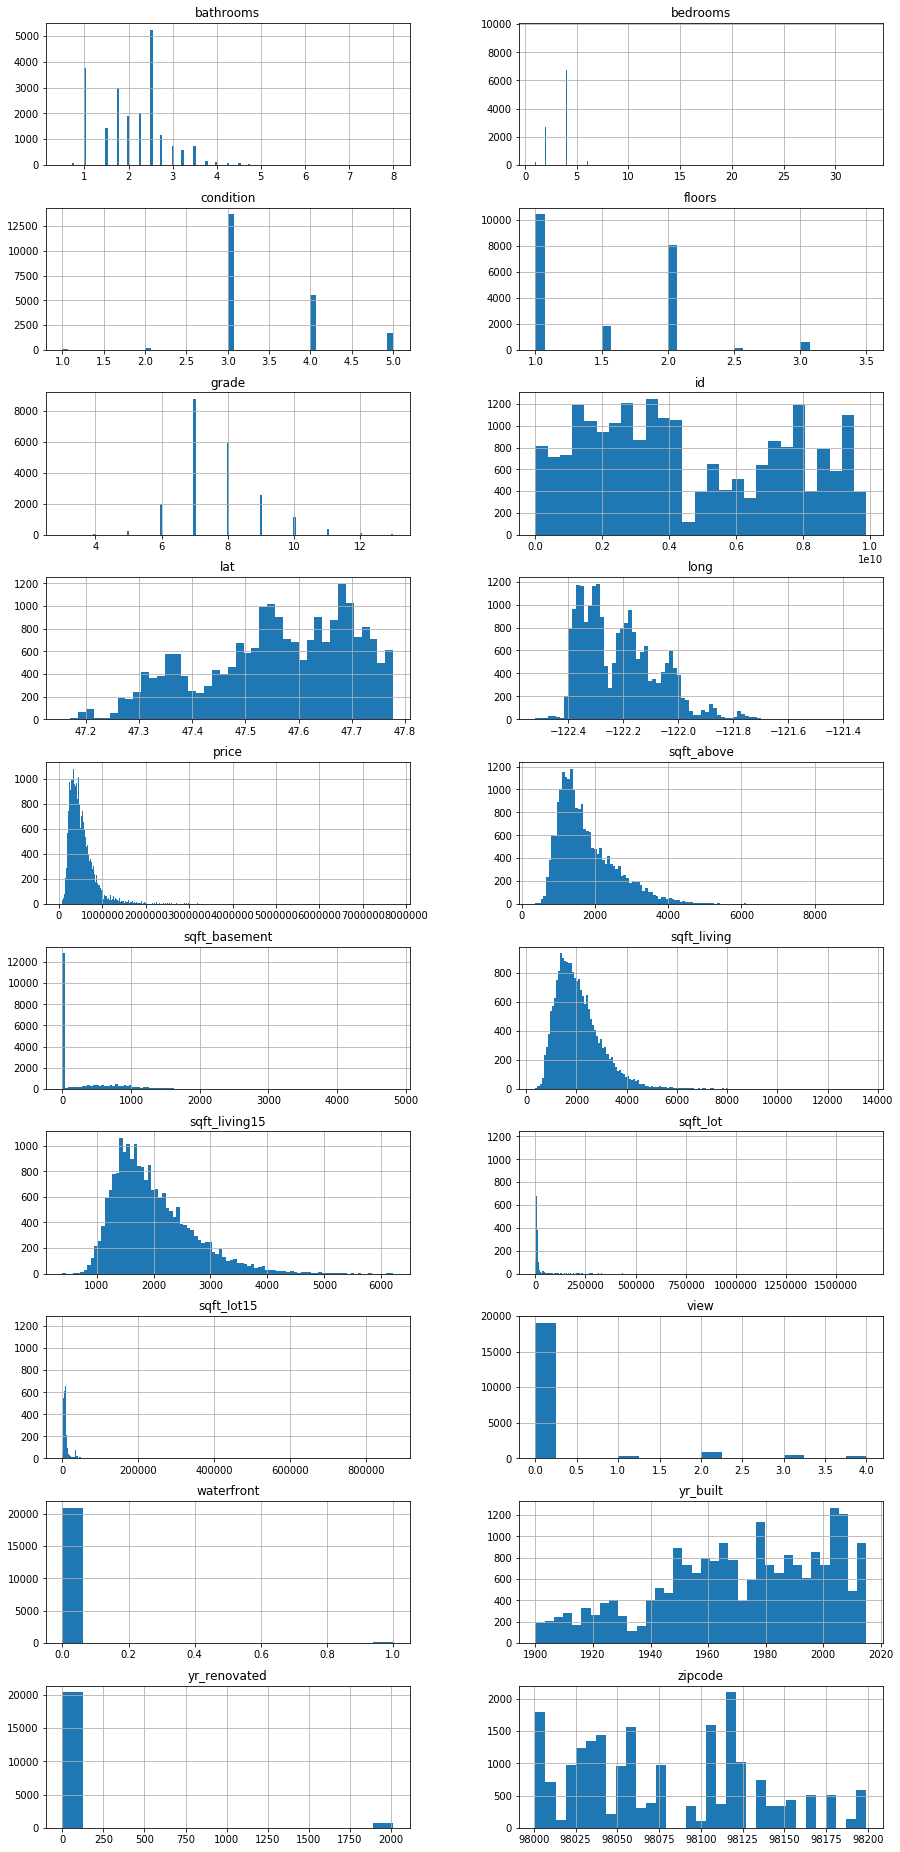

In [13]:
#Plot Variable Distributions

kc_df.hist(figsize=(15,40), layout=(12,2), bins='auto')

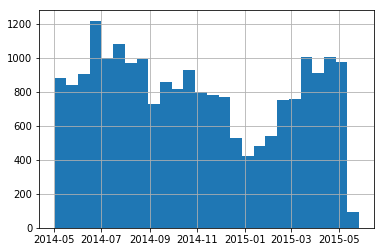

In [14]:
# Visualizing 'date' because hist ignores datetime columns

kc_df['date'].hist(bins='auto')

#### Variable Distribution Shape

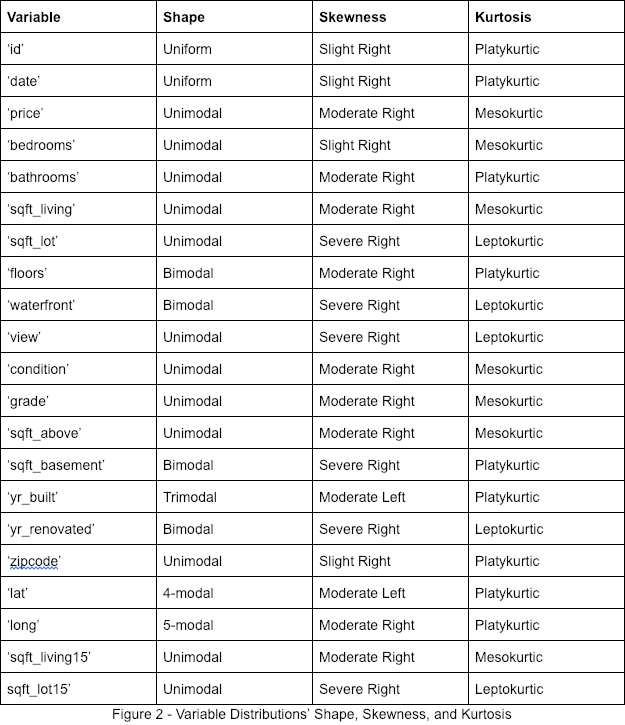

#### Variable Summary Statistics


In [15]:
#Summary Statistics

kc_df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.108200e+04  2.108200e+04  21082.000000  21082.000000  21082.000000   
mean   4.582793e+09  5.402469e+05      3.372403      2.115916   2080.359975   
std    2.876423e+09  3.667323e+05      0.924996      0.768142    917.856396   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123700e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904970e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.312200e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot       floors    waterfront          view     condition  \
count  2.108200e+04  21082.00000  21082.000000  21082.000000  21082.000000   
mean   1.507759e+04      1.49362      0.006688      0.233327      3.409828   
std    4.117338e+04      0.53937      0.081509      0.765066      0.650597   
min    5.200000e+02      1.00000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.00000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.50000      0.000000      0.000000      3.000000   
75%    1.069775e+04      2.00000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.50000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21082.000000  21082.000000   21082.000000  21082.000000  21082.000000   
mean       7.657717   1789.000000     291.359975   1971.023337     68.359359   
std        1.173690    828.369355     442.007858     29.323120    363.029573   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21082.000000  21082.000000  21082.000000   21082.000000   21082.000000  
mean   98077.858837     47.560371   -122.213843    1986.917418   12732.514135  
std       53.528769      0.138568      0.140607     685.544250   27148.781580  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471325   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.572200   -122.230000    1840.000000    7626.000000  
75%    98117.000000     47.678200   -122.125000    2360.000000   10088.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Some interesting generalizations can be inferred from the distributions.  We can see that the number of homes built decreased suddenly during two periods of time in **‘yr_built’**.  These dramatic decreases coincide with two of the bigger recessions (the Great Depression and the 1970s Recession) in the nation’s history.  In both **‘lat’** and **‘long’**, we can see that homes are plausibly clustered in about five locations.  It seems that King County has five main residential locations based on homes sold in these areas (Figure 3).  Were any homes sold more than once?  Did it sell for more or less?  From **‘date’**, it seems that more homes are bought during the summer months as opposed to the winter ones. Does the time of year affect number homes sold or home prices? Does zipcode?    

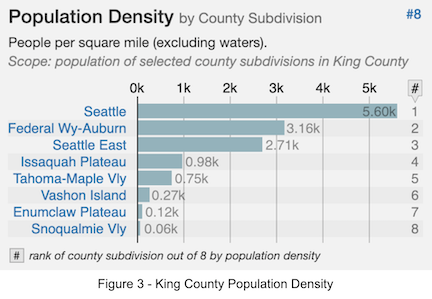

In [16]:
# Detecting how many homes were sold more than once

saleCount = kc_df.groupby('id').size().sort_values(ascending=False)
soldMoreThanOnce = []

for idnum,count in saleCount.iteritems():
    if count > 1:
        soldMoreThanOnce.append(idnum)
        
print(len(soldMoreThanOnce),'or', round(172/21420*100,2), '% of homes were sold more than once during this period.')
print('The home sold most during the period was home id number:', list(saleCount.iteritems())[0][0], 'which was sold a total of',list(saleCount.iteritems())[0][1],'times.')


172 or 0.8 % of homes were sold more than once during this period.
The home sold most during the period was home id number: 795000620 which was sold a total of 3 times.


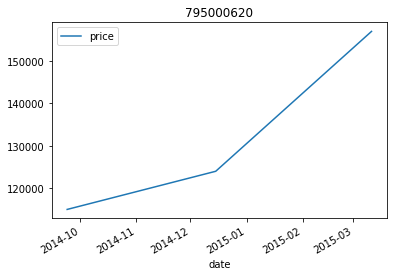

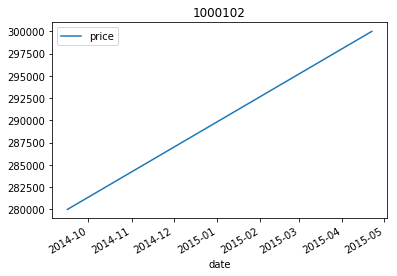

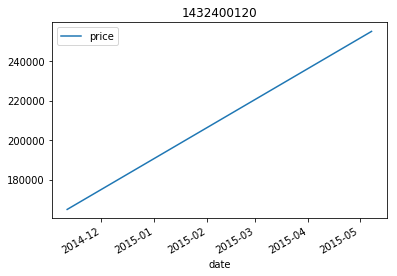

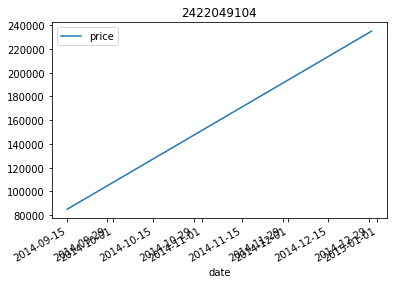

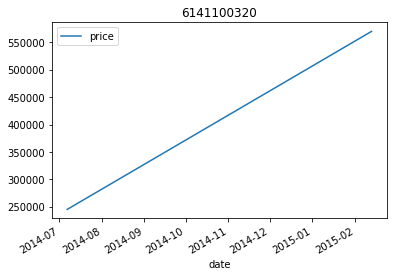

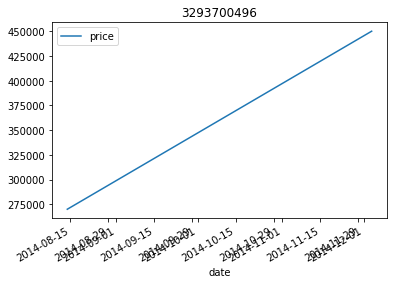

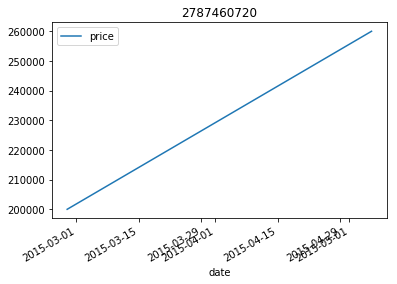

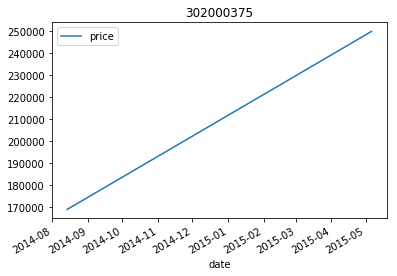

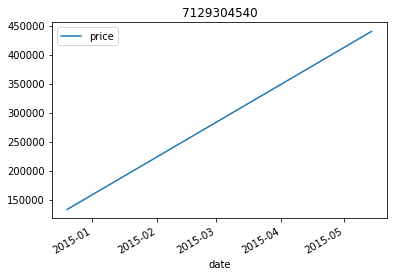

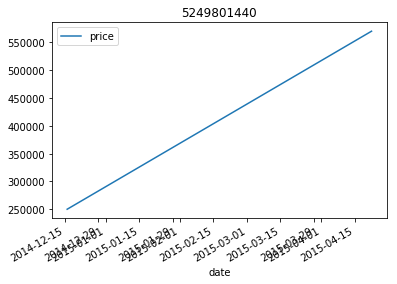

In [17]:
#Visualization of how home sale prices changed for the homes that were sold more than once during the period
for idnum in soldMoreThanOnce[:10]:
    kc_df[kc_df['id'] == idnum].plot('date','price')
    plt.title(idnum)
    plt.show()

In [18]:
#Seeing how many of the homes sold more than once experience a sale price inflation
posprofit = 0
for idnum in soldMoreThanOnce:
    low = kc_df[kc_df['id'] == idnum]['price'].iloc[0]
    high = kc_df[kc_df['id'] == idnum]['price'].iloc[-1]
    if high-low > 0:
        posprofit += 1
        
print(posprofit, 'of the', len(soldMoreThanOnce), 'homes (', round(posprofit/len(soldMoreThanOnce)*100,2), '%) that were sold multiple times during the period were sold for higher prices the second (or third) time.')



163 of the 172 homes ( 94.77 %) that were sold multiple times during the period were sold for higher prices the second (or third) time.


Less than one percent of the homes represented in the dataset were sold more than once.  Of the homes that were sold more than once during the period, almost every home (95%) was sold at a higher price the following time(s).  This could indicate that these homes are targets of those who wish to flip these homes.  This can be useful to potential "flippers" who can use this information to see which homes/areas are being targeted by others.  Alternatively, one can use this information to measure the efficiency of the potential investment in a home.  Homes that haven't been sold in the recent years could be better investments for people looking to get the most out of their money in terms of potential capital appreciation.

In [19]:
#Detecting whether or not the four seasons affect the number of homes sold or the average price of the sold homes.

#Filter sales by seasons
spring_sales_df = kc_df[(kc_df['date'].map(lambda date: date.month == 2))|(kc_df['date'].map(lambda date: date.month == 3))|(kc_df['date'].map(lambda date: date.month == 4))]
summer_sales_df = kc_df[(kc_df['date'].map(lambda date: date.month == 5))|(kc_df['date'].map(lambda date: date.month == 6))|(kc_df['date'].map(lambda date: date.month == 7))]
fall_sales_df = kc_df[(kc_df['date'].map(lambda date: date.month == 8))|(kc_df['date'].map(lambda date: date.month == 9))|(kc_df['date'].map(lambda date: date.month == 10))]
winter_sales_df = kc_df[(kc_df['date'].map(lambda date: date.month == 11))|(kc_df['date'].map(lambda date: date.month == 12))|(kc_df['date'].map(lambda date: date.month == 1))]

#Number of sales and average price by season
print('Spring Sales\n','Number of homes sales:', len(spring_sales_df), '\n', 'Average price: $', round(spring_sales_df['price'].mean(),2))
print('Summer Sales\n','Number of homes sales:', len(summer_sales_df), '\n', 'Average price: $', round(summer_sales_df['price'].mean(),2))
print('Fall Sales\n','Number of homes sales:', len(fall_sales_df), '\n', 'Average price: $', round(fall_sales_df['price'].mean(),2))
print('Winter Sales\n','Number of homes sales:', len(winter_sales_df), '\n', 'Average price: $', round(winter_sales_df['price'].mean(),2))



Spring Sales
 Number of homes sales: 5222 
 Average price: $ 543266.4
Summer Sales
 Number of homes sales: 6654 
 Average price: $ 550992.05
Fall Sales
 Number of homes sales: 5442 
 Average price: $ 534689.17
Winter Sales
 Number of homes sales: 3764 
 Average price: $ 525097.84


As suspected, homes sales seem to be cyclical.  The most (35%) homes are sold in the summer.  The number of homes sold decreases in the fall and bottoms out (18%) in the winter before increasing in the spring.  Consistent with the effects of supply and demand on home prices, homes sell for more in the summer and the least in the winter.  This is very useful to people in the housing market!  People looking to sell should wait until their homes maximize value in the summer.  Conversely, potential home buyers should wait until homes minimize value in the winter.  

In [20]:
#Which zipcodes have the highest average prices? Lowest?

zip_price_df = kc_df[['price','zipcode']].groupby('zipcode').mean().sort_values('price',ascending=False)
print('Zipcode', zip_price_df.iloc[0].name, 'has the highest average home sale price at $', round(zip_price_df.iloc[0].price,2))
print('Zipcode', zip_price_df.iloc[-1].name, 'has the lowest average home sale price at $', round(zip_price_df.iloc[-1].price,2))

#Which zipcodes sell the most homes?

zip_count_df = kc_df[['id','zipcode']].groupby('zipcode').count().sort_values('id',ascending=False)
print('Zipcode', zip_count_df.iloc[0].name, 'has the most homes sold with', zip_count_df.iloc[0].id, 'sold')
print('Zipcode', zip_count_df.iloc[-1].name, 'has the most least sold with', zip_count_df.iloc[-1].id, 'sold')


#Join the last two zipcode dataframes
zip_df = zip_price_df.join(zip_count_df,how='inner')
zip_df = zip_df.rename(columns = {'id':'homes_sold'})

#Qualitative metric -- Calculates number homes sold divided by average home price (by zipcode).  
zip_df['target_metric'] = zip_df.apply(lambda row: row.homes_sold/row.price, axis=1)
zip_df.sort_values('target_metric',ascending=False).head(10)



Zipcode 98039 has the highest average home sale price at $ 2135612.24
Zipcode 98002 has the lowest average home sale price at $ 234512.74
Zipcode 98103 has the most homes sold with 587 sold
Zipcode 98039 has the most least sold with 49 sold


price  homes_sold  target_metric
zipcode                                          
98042    311786.979630         540       0.001732
98023    283932.361570         484       0.001705
98038    366476.504378         571       0.001558
98133    386460.070393         483       0.001250
98058    352936.913832         441       0.001250
98001    281478.769231         351       0.001247
98118    418176.794769         497       0.001188
98168    241543.609195         261       0.001081
98106    319821.480243         329       0.001029
98155    424395.310345         435       0.001025

Analyzing the average home sale prices by zipcode gives a beneficial geographical view of the King County housing market.  One can see where the most and least valuable homes are and by monitoring this data over time, one can discover which areas are trending upwards and downwards.  This helps investors target the best investments.  As expected and generally speaking, the most valuable areas experience the least home sales.  As home prices increase, the number of interested buyers decrease.  We designed a crude qualitative metric that combines the number of sold homes with the average home price in each zipcode.  A higher score indicates higher demand (volume) and/or lower average price.  This can be beneficial to investors targeting homes, as it indicates which areas in the county have the highest demand per dollar.  It should be taken with a grain of salt, however, as the metric's magnitude is dubious.

#### Binning and One-Hot-Encoding Appropriate Variables

Next, we will determine whether or not any of the quantitative variables act as de facto qualitative variables.  The shape of the distribution will be the primary indication of this behavior.  Extremely *bimodal* (or *trimodal*, etc.) distributions may suggest that the variable values may actually belong to two (or more) categories.  For these variables, we will *bin* the values into an appropriate amount of categories thereby transforming the quantitative data into qualitative data.  Once this is completed, we will *one-hot-encode* each qualitative variable in preparation for linear regression modeling.  For each variable, this will involve turning each category into a *binary column*.  Because this adds an additional column to the dataframe for each individual category, we should not attempt to bin quantitative data unless we can bin them into a small number of groups.

Multimodal characteristics exist in the distributions of **‘floors’**, **‘waterfront**’, **‘sqft_basement’**, **‘yr_built’**, **‘yr_renovated’**, **‘lat’**, and **‘long’**.  Of these variables, we will bin and then one-hot-encode three -- **‘waterfront’**, **‘sqft_basement’**, and **‘yr_renovated’**.  We believe that these variables exhibit true qualitative behavior and that binning them will increase predictive power.  Binning quantitative variable involves decreasing data resolution which we believe will be useful in **‘floors’** and **‘yr_built’** so these variables will not be binned.  As aforementioned, the data present in **‘lat’** and **‘long’** shows evidence that homes in King County belong to about five regions -- a qualitative distinction.  Ideally, this data would be binned but for the sake of time and simplicity (we don’t want to add an additional 5+ columns to the dataframe and bin 2-D data), we will not attempt to bin **‘lat’** and **‘long’**.

**‘Waterfront’**, **‘sqft_basement’**, and **'yr_renovated’** will be binned in the same manner.  Each variables’ value will be sorted into an *affirmative* or *negative* category.  For example, each sold home will either be or not be waterfront, will have or not have a basement, and will have been or will not have been renovated.  Any non-zero variable value will signify that the home in question belongs to the affirmative category while a zero value signifies the opposite.  To finish, we will rename the columns that require it.  After the binning is done, we will one-hot-encode each of the three variables -- each variable’s column will be replaced by two binary columns.  The dataframe will now have 24 columns (21 - 3 + 6).

In [20]:
# Binning 'waterfront', 'sqft_basement', 'yr_renovated'

toBeBinned = ['waterfront', 'sqft_basement', 'yr_renovated']

for variable in toBeBinned:
    kc_df[variable] = pd.cut(kc_df[variable], [np.NINF,0,np.Inf], labels=['no','yes'])
    
# Rename appropriate columns
kc_df.rename({'sqft_basement':'basement','yr_renovated':'renovated'}, axis=1, inplace=True)

kc_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors waterfront  view  condition  grade  sqft_above basement  \
0    5650.0     1.0         no   0.0        3.0    7.0      1180.0       no   
1    7242.0     2.0         no   0.0        3.0    7.0      2170.0      yes   
2   10000.0     1.0         no   0.0        3.0    6.0       770.0       no   
3    5000.0     1.0         no   0.0        5.0    7.0      1050.0      yes   
4    8080.0     1.0         no   0.0        3.0    8.0      1680.0       no   

   yr_built renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0    1955.0        no    98178  47.5112 -122.257         1340.0      5650.0  
1    1951.0       yes    98125  47.7210 -122.319         1690.0      7639.0  
2    1933.0        no    98028  47.7379 -122.233         2720.0      8062.0  
3    1965.0        no    98136  47.5208 -122.393         1360.0      5000.0  
4    1987.0        no    98074  47.6168 -122.045         1800.0      7503.0

In [21]:
# One-hot-encoding binned variables

toBeEncoded = ['waterfront','basement','renovated']

for variable in toBeEncoded:
    catVar = kc_df[variable].astype('category')
    varDummies = pd.get_dummies(catVar, prefix=variable)
    kc_df.drop(variable,axis=1,inplace=True)
    kc_df = pd.concat([kc_df,varDummies], axis=1)
    
kc_df.head()


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  view  condition  grade  sqft_above  yr_built  zipcode  \
0    5650.0     1.0   0.0        3.0    7.0      1180.0    1955.0    98178   
1    7242.0     2.0   0.0        3.0    7.0      2170.0    1951.0    98125   
2   10000.0     1.0   0.0        3.0    6.0       770.0    1933.0    98028   
3    5000.0     1.0   0.0        5.0    7.0      1050.0    1965.0    98136   
4    8080.0     1.0   0.0        3.0    8.0      1680.0    1987.0    98074   

       lat     long  sqft_living15  sqft_lot15  waterfront_no  waterfront_yes  \
0  47.5112 -122.257         1340.0      5650.0              1               0   
1  47.7210 -122.319         1690.0      7639.0              1               0   
2  47.7379 -122.233         2720.0      8062.0              1               0   
3  47.5208 -122.393         1360.0      5000.0              1               0   
4  47.6168 -122.045         1800.0      7503.0              1               0   

   basement_no  basement_yes  renovated_no  renovated_yes  
0            1             0             1              0  
1            0             1             0              1  
2            1             0             1              0  
3            0             1             1              0  
4            1             0             1              0

#### Transform and Scale Variables

We will then transform the necessary variables in an attempt to coax non-normal variable distributions into more normal ones.  In this study, we will only consider using the *logarithmic* transformation.  Log transformations are useful when dealing with skewed data.  Of the 21 original variables, four (**‘id’**, **‘date’**, **‘bedrooms’**, **‘zipcode’**) are slightly skewed and do not require transformation.  Three of them (**‘waterfront’**, **‘sqft_basement’**, **‘yr_renovated’**) were binned and one-hot-encoded so they also do not require transformation.  Logs (without additional transformations) are undefined for numbers less than or equal to zero and so for the sake of simplicity, we will exclude **‘view’** and **‘long’** from transformation.  We will log transform the remaining variables.  

In [22]:
## log Transform appropriate variables

logTransList = ['price','bathrooms','sqft_living','sqft_lot','floors','condition',
                'grade','sqft_above','yr_built','lat','sqft_living15','sqft_lot15']

logkc_df = kc_df.copy()

## change datetime values into unix time
logkc_df['date'] = pd.to_numeric(logkc_df['date'])

for variable in logTransList:
    logkc_df[variable] = logkc_df[variable].map(lambda x: np.log(x))
    


In [23]:
#Rename log transformed columns to make transformation more obvious
logRenameDict = {}

for variable in logTransList:
    logRenameDict[variable] = 'log_'+variable

logkc_df.rename(logRenameDict, axis=1, inplace=True)

logkc_df.head()
    

id                 date  log_price  bedrooms  log_bathrooms  \
0  7129300520  1413158400000000000  12.309982       3.0       0.000000   
1  6414100192  1418083200000000000  13.195614       3.0       0.810930   
2  5631500400  1424822400000000000  12.100712       2.0       0.000000   
3  2487200875  1418083200000000000  13.311329       4.0       1.098612   
4  1954400510  1424217600000000000  13.142166       3.0       0.693147   

   log_sqft_living  log_sqft_lot  log_floors  view  log_condition  log_grade  \
0         7.073270      8.639411    0.000000   0.0       1.098612   1.945910   
1         7.851661      8.887653    0.693147   0.0       1.098612   1.945910   
2         6.646391      9.210340    0.000000   0.0       1.098612   1.791759   
3         7.580700      8.517193    0.000000   0.0       1.609438   1.945910   
4         7.426549      8.997147    0.000000   0.0       1.098612   2.079442   

   log_sqft_above  log_yr_built  zipcode   log_lat     long  \
0        7.073270      7.578145    98178  3.860965 -122.257   
1        7.682482      7.576097    98125  3.865372 -122.319   
2        6.646391      7.566828    98028  3.865726 -122.233   
3        6.956545      7.583248    98136  3.861168 -122.393   
4        7.426549      7.594381    98074  3.863186 -122.045   

   log_sqft_living15  log_sqft_lot15  waterfront_no  waterfront_yes  \
0           7.200425        8.639411              1               0   
1           7.432484        8.941022              1               0   
2           7.908387        8.994917              1               0   
3           7.215240        8.517193              1               0   
4           7.495542        8.923058              1               0   

   basement_no  basement_yes  renovated_no  renovated_yes  
0            1             0             1              0  
1            0             1             0              1  
2            1             0             1              0  
3            0             1             1              0  
4            1             0             1              0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6471d0>,
      dtype=object)

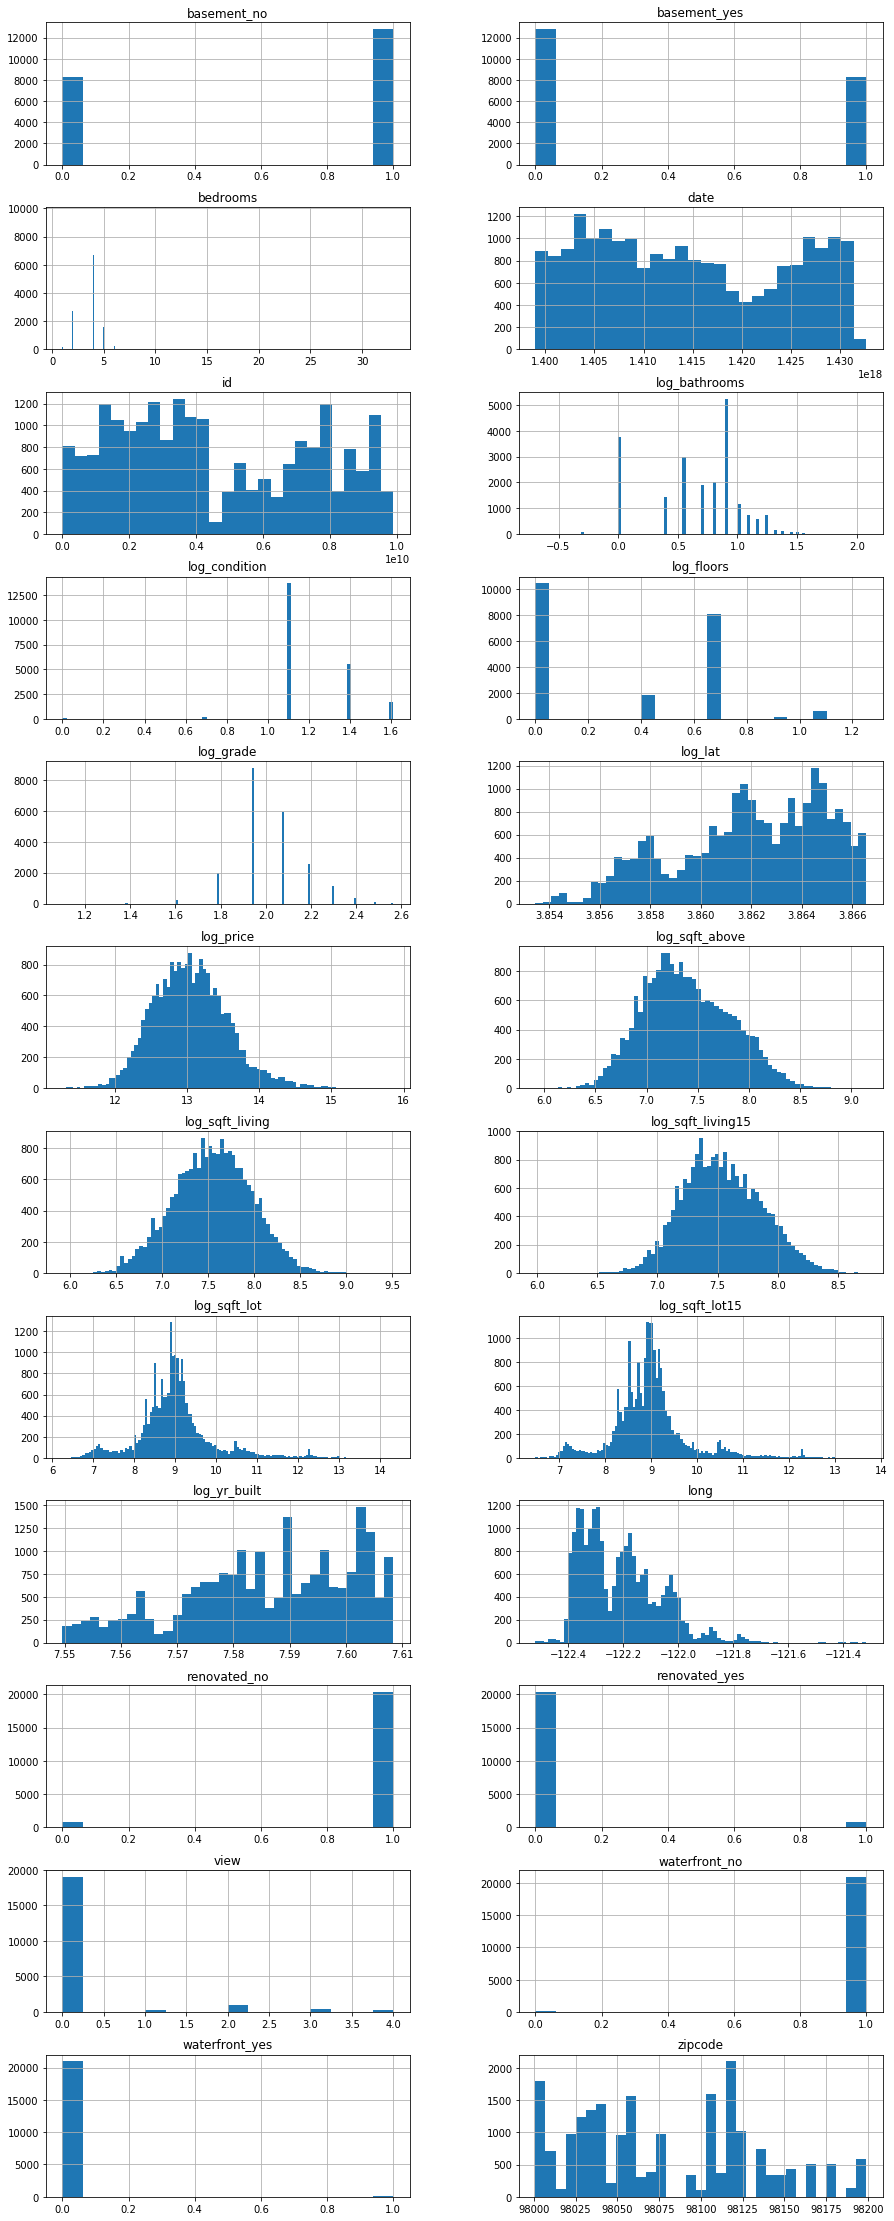

In [24]:
#Check for log transformation effects of variables - Can see binned and encoded columns as well

logkc_df.hist(figsize=(15,40), layout=(12,2), bins='auto')

Log transformation improved distribution normality in half of the transformed variables (**‘price’**, **‘sqft_above’**, **‘sqft_living’**, **‘sqft_living15’**, **‘sqft_lot’**, and **‘sqft_lot15’**).  Negligible improvement was seen in the others.  These variables will be returned to their pre-transformed values for ease of future calculations.  Next, we will scale all variables (except the binned/encoded variables) using the *standardization* method to minimize the effect of having variables with units of different magnitudes on the modeling.  Note that to scale **‘date’**, we will need to use the *to_numeric* to transform its values into numeric ones.  The method turns the *datetime* values into *unix time* (x nanoseconds since the start of 1970).

In [25]:
#Undo the log transformation on the columns on which it had negligible effect
undoList = ['log_bathrooms','log_condition','log_floors','log_grade','log_lat',
            'log_yr_built']

expRenameDict = {}

for variable in undoList:
    logkc_df[variable] = logkc_df[variable].map(lambda x: np.exp(x))
    expRenameDict[variable] = variable.replace('log_','')

#Rename the columns where the log transformation was undone
logkc_df.rename(expRenameDict, axis=1, inplace=True)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b29f198>,
      dtype=object)

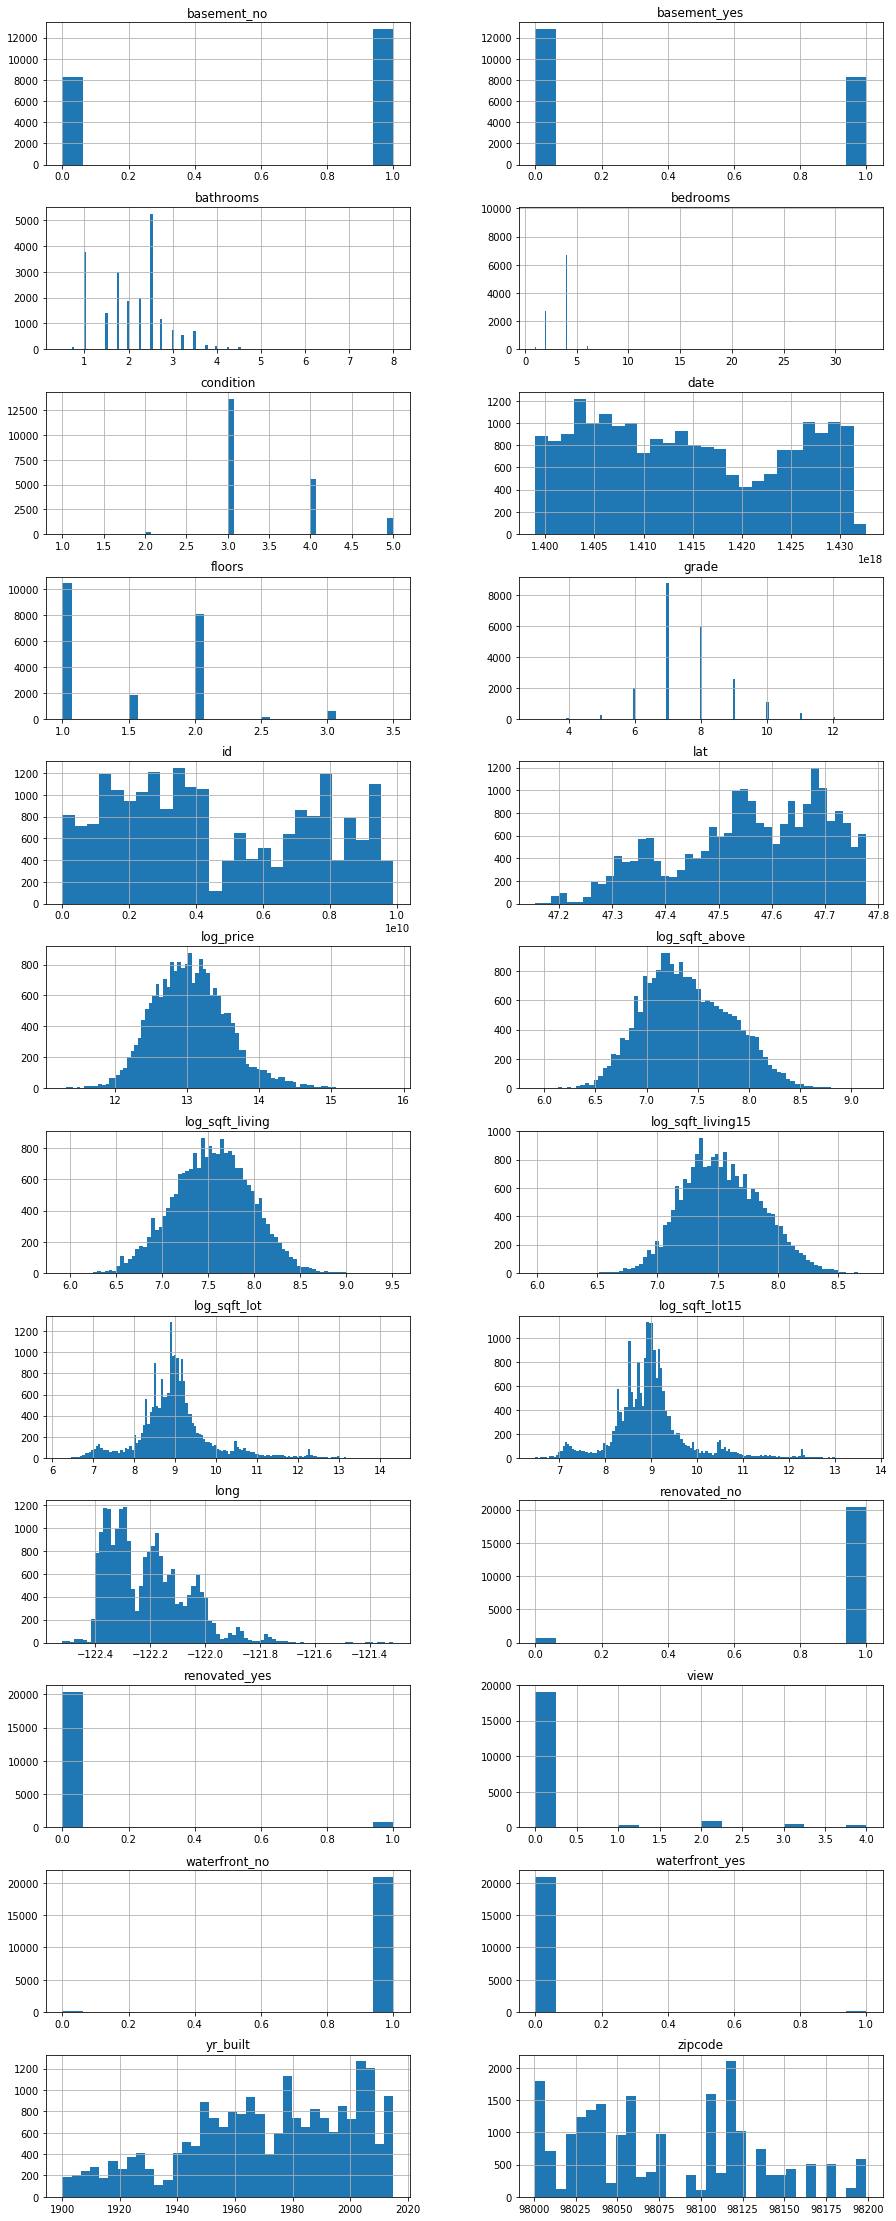

In [27]:
logkc_df.hist(figsize=(15,40), layout=(12,2), bins='auto')

In [28]:
# Scale all variables with standardization method

scaled_logkc_df = logkc_df.copy()

scaleList = ['id', 'date', 'log_price', 'bedrooms', 'bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'floors', 'view', 'condition', 'grade',
       'log_sqft_above', 'yr_built', 'zipcode', 'lat', 'long',
       'log_sqft_living15', 'log_sqft_lot15']


for variable in scaleList:
    scaled_logkc_df[variable] = scaled_logkc_df[variable].map(lambda x: (x - scaled_logkc_df[variable].mean())/np.sqrt(scaled_logkc_df[variable].var()))

    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b29fb38>,
      dtype=object)

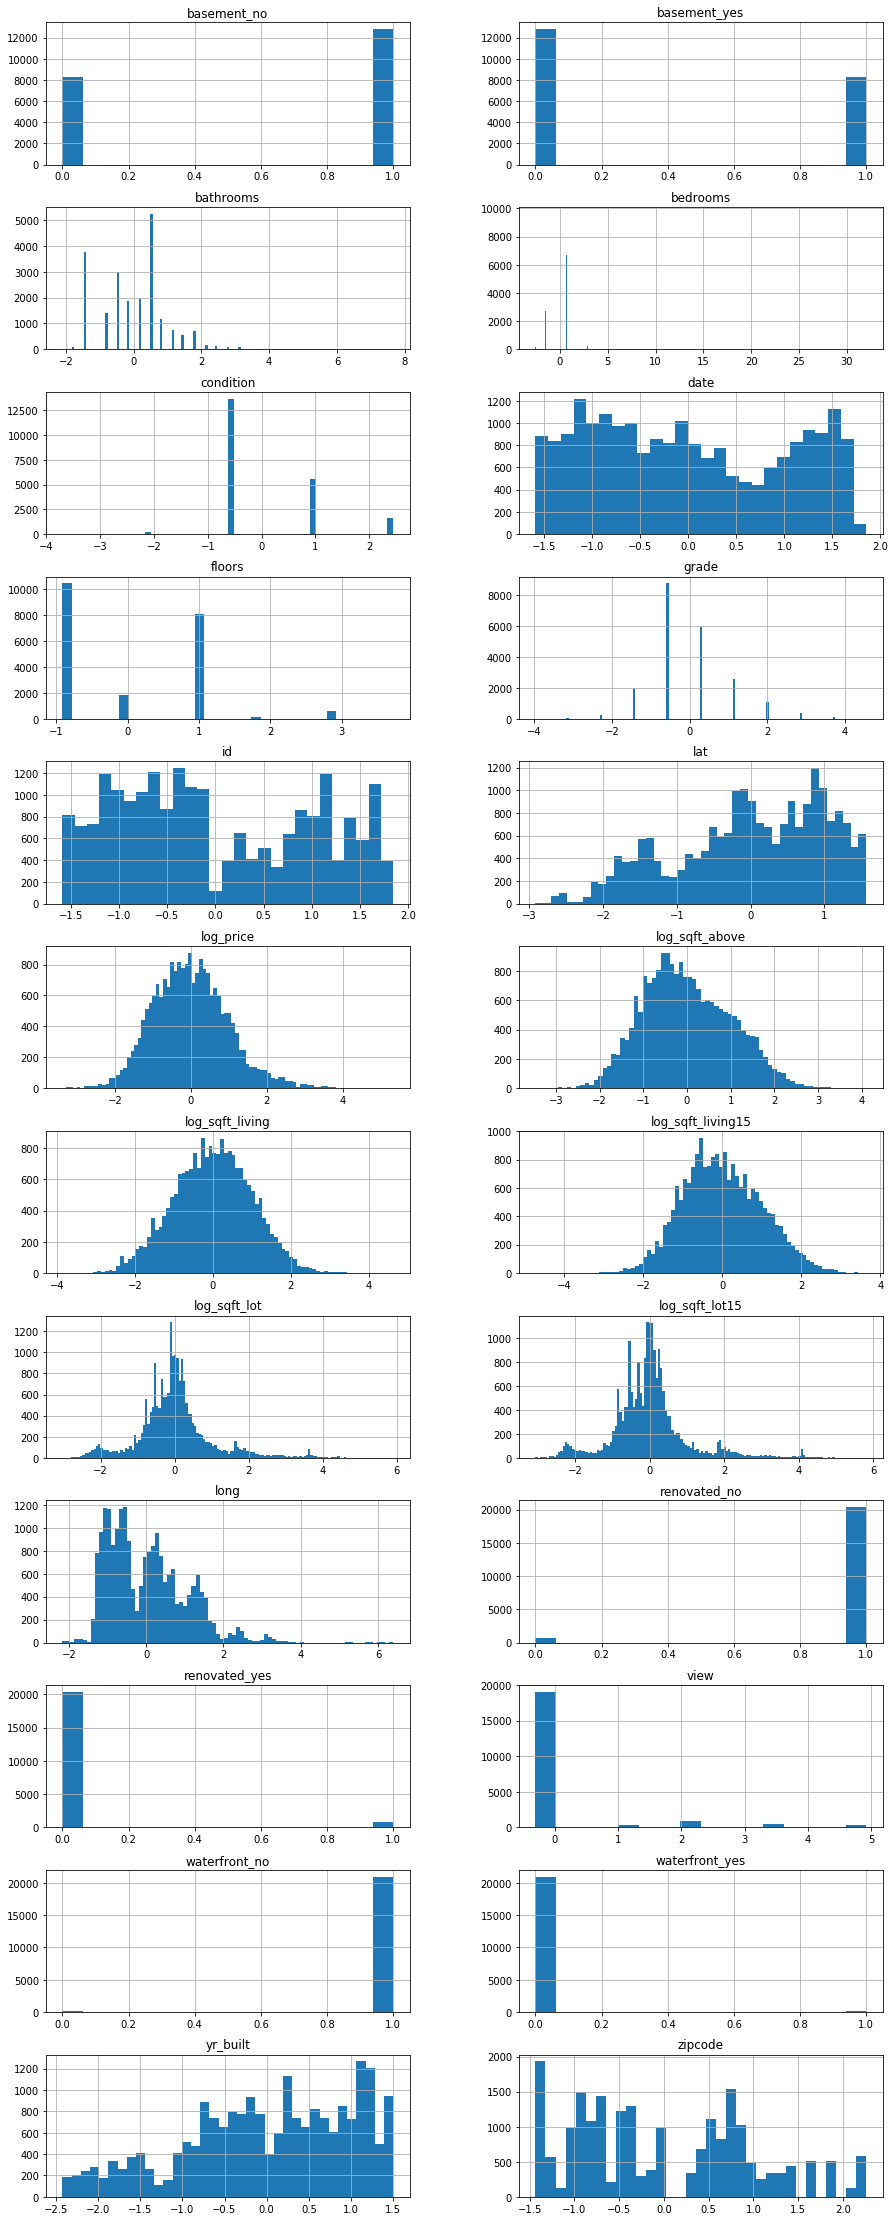

In [29]:
#Visualizing the end result of cleaning and preparing the data for modeling
scaled_logkc_df.hist(figsize=(15,40), layout=(12,2), bins='auto')

Feature scaling was a success.  Each of the scaled variables is now centered at zero with a standard deviation of one.  The effect of different unit scale magnitudes on linear regression is minimized.  We are almost ready to model!   


## Part 4: Model

Before we fit our first model, we will check the features for *linearity* (with our target variable -- **‘log_price’**) and *multicollinearity* with each other.  Linearity is one of the three assumptions that linear regression analysis must satisfy to be reliable.  There must be a discernible linear relationship between each feature and the target variable.  In multiple linear regression analysis, multicollinearity describes the phenomena of when feature variables are highly correlated with other feature variables.  The presence of multicollinearity decreases the predictive power of the analysis by confounding the features’ effects on the target variable.  We will detect linearity and multicollinearity by using a scatter plot and correlation matrices.

#### Scatter and Correlation Matrices

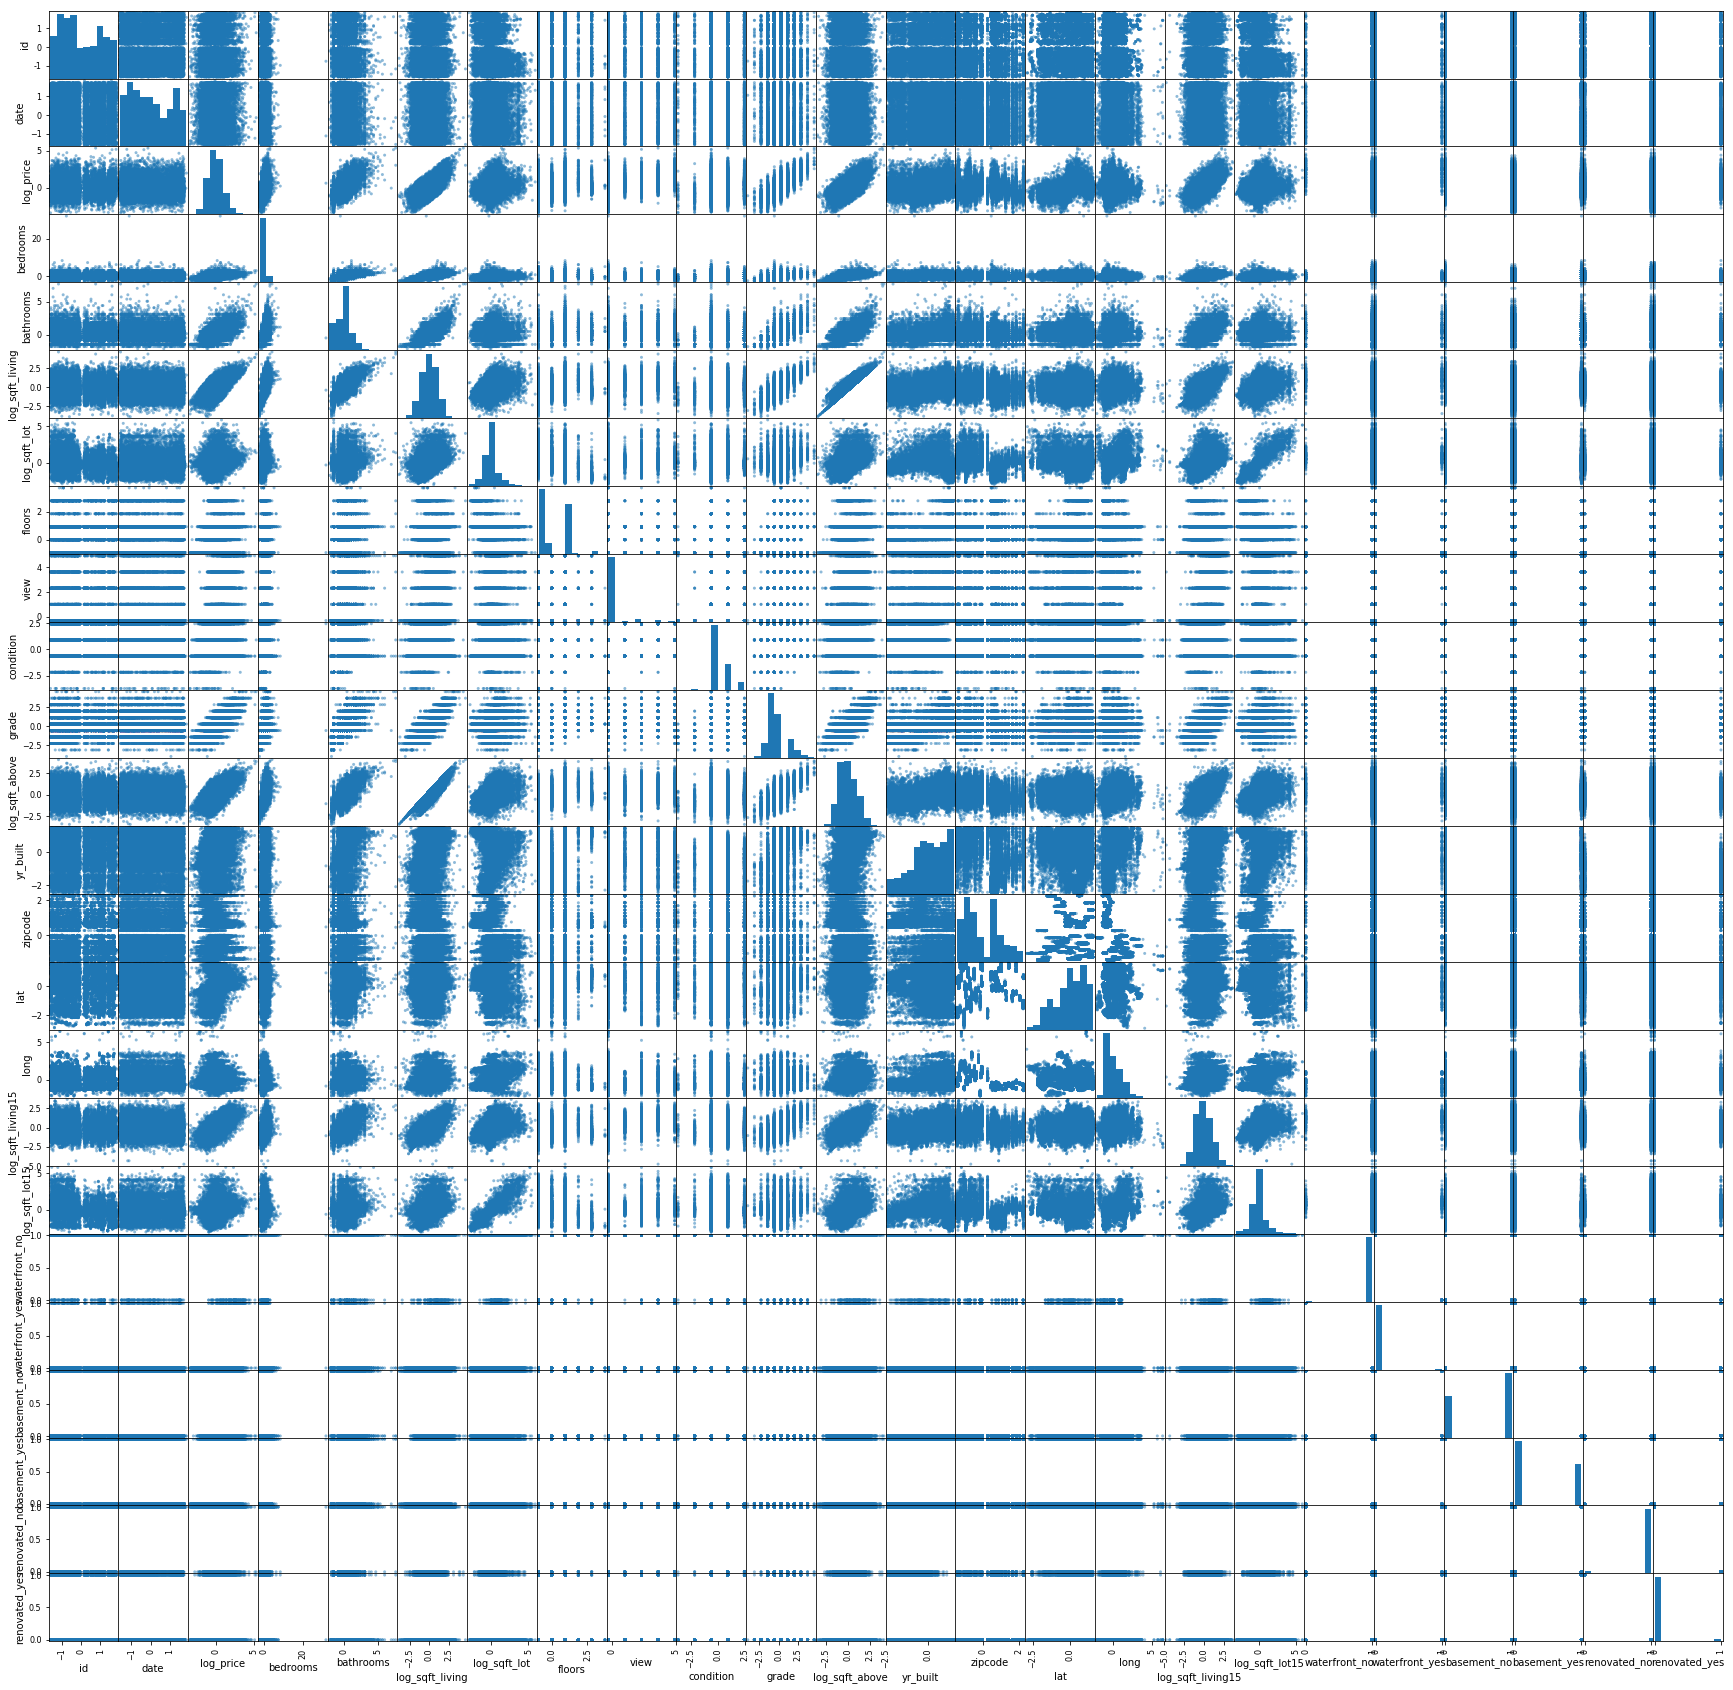

In [25]:
#Scatter plot matrix
pd.plotting.scatter_matrix(scaled_logkc_df, figsize=[30,30]);

In [30]:
#Correlation matrix
scaled_logkc_df.corr()

id      date  log_price  bedrooms  bathrooms  \
id                 1.000000  0.004673  -0.004229  0.002267   0.005873   
date               0.004673  1.000000  -0.003016 -0.015515  -0.031839   
log_price         -0.004229 -0.003016   1.000000  0.342500   0.550653   
bedrooms           0.002267 -0.015515   0.342500  1.000000   0.513694   
bathrooms          0.005873 -0.031839   0.550653  0.513694   1.000000   
log_sqft_living   -0.001205 -0.031759   0.674443  0.621083   0.761380   
log_sqft_lot      -0.149004 -0.010273   0.138298  0.185048   0.099868   
floors             0.019150 -0.021497   0.309980  0.178518   0.503796   
view               0.012859 -0.001214   0.345778  0.080379   0.187249   
condition         -0.023410 -0.049664   0.037113  0.025652  -0.128167   
grade              0.008765 -0.037035   0.703195  0.356418   0.665992   
log_sqft_above    -0.000977 -0.025450   0.585818  0.515589   0.695271   
yr_built           0.022179  0.000429   0.081179  0.156820   0.508866   
zipcode           -0.010959  0.001438  -0.038524 -0.152539  -0.204016   
lat               -0.005062 -0.033100   0.449540 -0.009939   0.025243   
long               0.021254 -0.006779   0.051216  0.131398   0.224660   
log_sqft_living15 -0.003162 -0.028019   0.607589  0.405070   0.571445   
log_sqft_lot15    -0.146644 -0.011761   0.124193  0.161893   0.091349   
waterfront_no      0.003588  0.001257  -0.168929  0.001578  -0.062055   
waterfront_yes    -0.003588 -0.001257   0.168929 -0.001578   0.062055   
basement_no       -0.003400  0.006151  -0.211610 -0.161593  -0.162504   
basement_yes       0.003400 -0.006151   0.211610  0.161593   0.162504   
renovated_no       0.009071  0.022607  -0.106558 -0.018082  -0.047303   
renovated_yes     -0.009071 -0.022607   0.106558  0.018082   0.047303   

                   log_sqft_living  log_sqft_lot    floors      view  \
id                       -0.001205     -0.149004  0.019150  0.012859   
date                     -0.031759     -0.010273 -0.021497 -0.001214   
log_price                 0.674443      0.138298  0.309980  0.345778   
bedrooms                  0.621083      0.185048  0.178518  0.080379   
bathrooms                 0.761380      0.099868  0.503796  0.187249   
log_sqft_living           1.000000      0.325868  0.367533  0.245960   
log_sqft_lot              0.325868      1.000000 -0.237851  0.120828   
floors                    0.367533     -0.237851  1.000000  0.027748   
view                      0.245960      0.120828  0.027748  1.000000   
condition                -0.052036      0.072916 -0.264259  0.045464   
grade                     0.743034      0.184192  0.459144  0.250014   
log_sqft_above            0.865049      0.319006  0.547464  0.157293   
yr_built                  0.350929     -0.007207  0.489898 -0.054415   
zipcode                  -0.221012     -0.281135 -0.058443  0.085300   
lat                       0.039979     -0.147173  0.049237  0.006174   
long                      0.256977      0.377032  0.125360 -0.076306   
log_sqft_living15         0.746270      0.363135  0.274829  0.264308   
log_sqft_lot15            0.303010      0.918143 -0.227918  0.118754   
waterfront_no            -0.077985     -0.070914 -0.019853 -0.380418   
waterfront_yes            0.077985      0.070914  0.019853  0.380418   
basement_no              -0.236783      0.051242  0.256441 -0.181294   
basement_yes              0.236783     -0.051242 -0.256441  0.181294   
renovated_no             -0.046557     -0.016249 -0.002953 -0.088482   
renovated_yes             0.046557      0.016249  0.002953  0.088482   

                   condition     grade  log_sqft_above  yr_built   zipcode  \
id                 -0.023410  0.008765       -0.000977  0.022179 -0.010959   
date               -0.049664 -0.037035       -0.025450  0.000429  0.001438   
log_price           0.037113  0.703195        0.585818  0.081179 -0.038524   
bedrooms            0.025652  0.356418        0.515589  0.156820 -0.152539   
bathroom

Out of the 23 potential feature variables, only five (**‘bathrooms’**, **‘log_sqft_living’**, **‘grade’**, **'log_sqft_above’**, **‘log_sqft_living15’**) show more than moderate linearity (r > 0.5) with our target, **‘log_price’**.  Of these five, **‘log_sqft_living’** shows strong collinearity (r > 0.75) with both **‘bathrooms’** and **‘log_sqft_above’**.  It will be removed from feature consideration, leaving four features with which to model the data.

#### Model v1

In [33]:
# Manually selected features model v1
features = scaled_logkc_df[['bathrooms','grade','log_sqft_above','log_sqft_living15']].copy()
features_int = sm.add_constant(features)
model = sm.OLS(scaled_logkc_df['log_price'],features_int).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     5925.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:31:16   Log-Likelihood:                -21970.
No. Observations:               21082   AIC:                         4.395e+04
Df Residuals:                   21077   BIC:                         4.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.816e-14      0.005   3.84e-12      1.000      -0.009       0.009
bathrooms             0.1052      0.007     15.196      0.000       0.092       0.119
grade                 0.4876      0.008     62.379      0.000       0.472       0.503
log_sqft_above       -0.0011      0.008     -0.135      0.893      -0.017       0.015
log_sqft_living15     0.2125      0.007     29.655      0.000       0.198       0.227
==============================================================================
Omnibus:                       87.780   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.632
Skew:                           0.149   Prob(JB):                     9.35e-20
Kurtosis:                       2.895   Cond. No.                         3.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model’s summary shows that of its four included features, three have coefficients whose *p-value* is zero.  The fourth, the one for **‘log_sqft_above’**, has a p-value of 0.893.  These p-values express the chance that the coefficients are actually zero (which suggests that the feature has no effect on the target). With such a high probability of the coefficient belonging to the distribution centered at zero, **‘log_sqft_above’** was removed and the model reconstructed.  As seen below, removal of this feature had negligible effect on the other features’ coefficients or the model’s *r^2*.

#### Model v2

In [34]:
# Manually selected features model v2
features1 = scaled_logkc_df[['bathrooms','grade','log_sqft_living15']].copy()
features1_int = sm.add_constant(features1)
model1 = sm.OLS(scaled_logkc_df['log_price'],features1_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     7901.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:31:29   Log-Likelihood:                -21970.
No. Observations:               21082   AIC:                         4.395e+04
Df Residuals:                   21078   BIC:                         4.398e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                1.8e-14      0.005   3.81e-12      1.000      -0.009       0.009
bathrooms             0.1049      0.006     16.197      0.000       0.092       0.118
grade                 0.4873      0.007     66.475      0.000       0.473       0.502
log_sqft_living15     0.2121      0.007     31.841      0.000       0.199       0.225
==============================================================================
Omnibus:                       87.888   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.717
Skew:                           0.149   Prob(JB):                     8.96e-20
Kurtosis:                       2.895   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

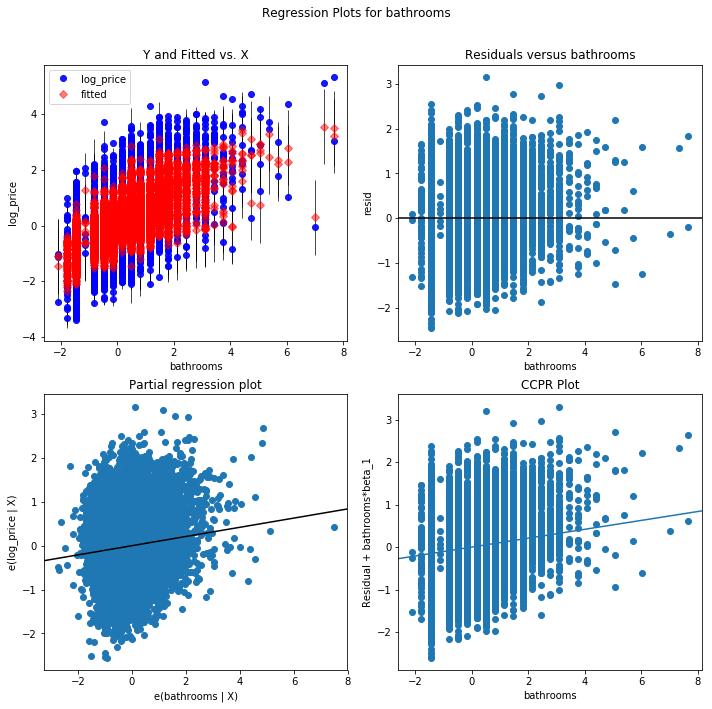

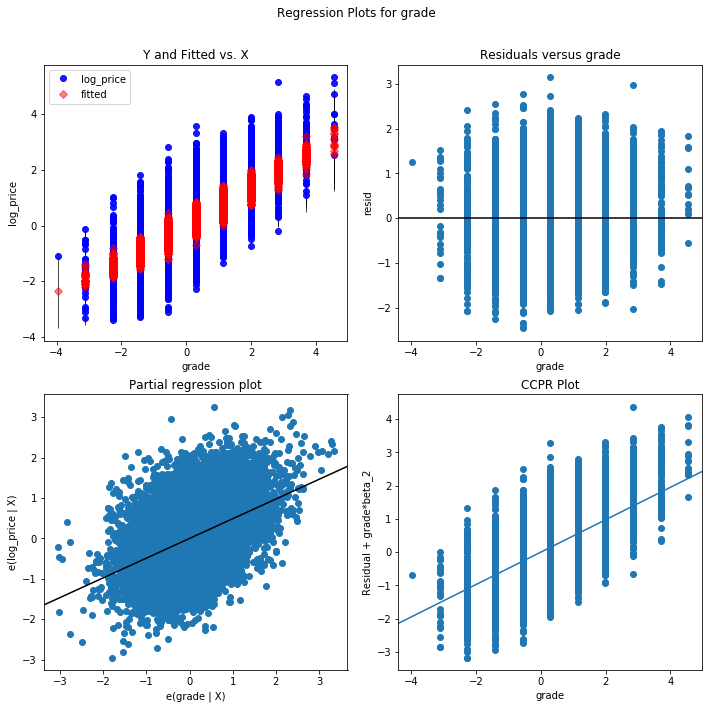

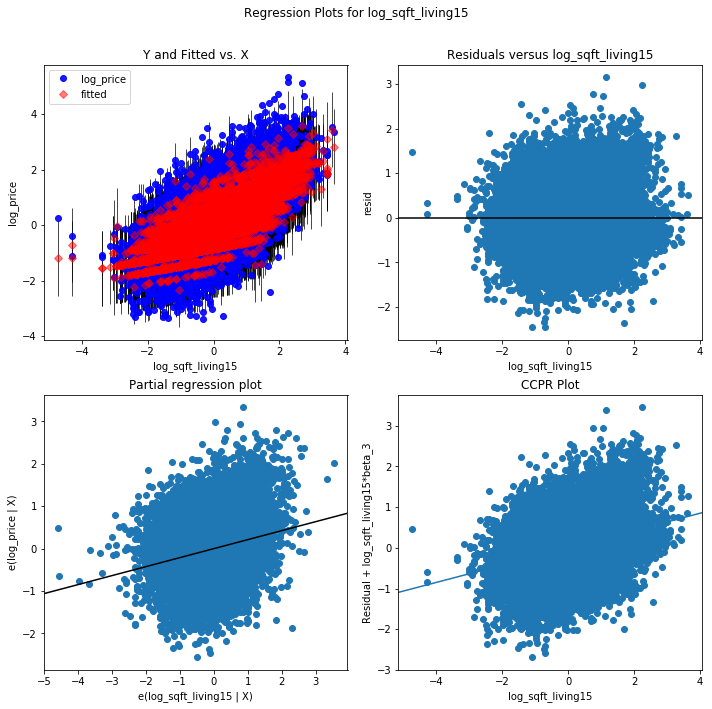

In [35]:
#Regression plots for manual model v2
for feature in features1.columns:
    fig = plt.figure(figsize=(10,10))
    fig = sm.graphics.plot_regress_exog(model1, feature, fig=fig)
    plt.show()
    
    


This model *adjusted coefficient of determination* suggests that the model fits the given data just fairly.  It indicates that that the variance in the independent variables (features) accounts for 53% of the variance in the dependent variable (target).  According to this model, almost half of the variance of the target variable is unaccounted for or due to randomness.  This is our best effort when manually selecting features to include in the model.  To see if we can improve on model quality, we will use *stepwise selection* to robustly and systematically select the best features for our next model.  We also checked the current model to see if it satisfied the linear regression assumptions of *homoscedasticity* and *normality*.  The regression plots show that slight heteroscedasticity exists in one of the features -- ‘bathrooms’.  The ‘Jarque-Bera’ statistics in the model’s summary (87.717) indicates that the model’s residuals fails the normality assumption by quite a bit.  Anything over six, is considered to have failed that normality null hypothesis.  Any presence of heteroscedasticity and non-normality in the model residuals weakens the predictive power of linear regressions.

#### Stepwise feature selection

In [36]:
#Stepwise feature selection code

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [37]:
features2 = scaled_logkc_df.drop(columns=['log_price']).copy()
result = stepwise_selection(features2, scaled_logkc_df['log_price'], verbose=True)
len(result)

Add  floors                         with p-value 0.0
Add  bathrooms                      with p-value 0.0
Add  grade                          with p-value 0.0
Add  lat                            with p-value 0.0
Add  log_sqft_living                with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  view                           with p-value 2.46628e-279
Add  log_sqft_living15              with p-value 1.57941e-111
Add  condition                      with p-value 3.57511e-84
Add  waterfront_no                  with p-value 1.2219e-67
Add  waterfront_yes                 with p-value 1.51423e-67
Add  date                           with p-value 2.75691e-37
Add  zipcode                        with p-value 3.35143e-33
Add  log_sqft_lot15                 with p-value 1.95856e-30
Add  bedrooms                       with p-value 9.51105e-26
Add  renovated_no                   with p-value 1.47699e-13
Add  renovated_yes                  with p-value 8.84339e-46
Add  long 

22

#### Model v3

In [38]:
features3 = scaled_logkc_df[result].copy()
features3_int = sm.add_constant(features3)
model3 = sm.OLS(scaled_logkc_df['log_price'],features3_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3819.
Date:                Fri, 07 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:32:48   Log-Likelihood:                -14189.
No. Observations:               21082   AIC:                         2.842e+04
Df Residuals:                   21062   BIC:                         2.858e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1855      0.009     19.957      0.000       0.167       0.204
floors                0.0501      0.005      9.843      0.000       0.040       0.060
bathrooms             0.0937      0.006     15.757      0.000       0.082       0.105
grade                 0.3676      0.006     62.827      0.000       0.356       0.379
lat                   0.3631      0.004    101.638      0.000       0.356       0.370
log_sqft_living       0.1434      0.014      9.918      0.000       0.115       0.172
yr_built             -0.2090      0.005    -41.585      0.000      -0.219      -0.199
view                  0.0990      0.004     25.855      0.000       0.091       0.106
log_sqft_living15     0.1313      0.006     23.732      0.000       0.120       0.142
condition             0.0776      0.004     21.190      0.000       0.070       0.085
waterfront_no        -0.2914      0.018    -16.514      0.000      -0.326      -0.257
waterfront_yes        0.4769      0.026     18.286      0.000       0.426       0.528
date                  0.0423      0.003     12.902      0.000       0.036       0.049
zipcode              -0.0633      0.004    -14.992      0.000      -0.072      -0.055
log_sqft_lot15       -0.0643      0.008     -7.642      0.000      -0.081      -0.048
bedrooms             -0.0433      0.004     -9.945      0.000      -0.052      -0.035
renovated_no          0.0183      0.009      2.032      0.042       0.001       0.036
renovated_yes         0.1672      0.012     14.002      0.000       0.144       0.191
long                 -0.0243      0.004     -5.405      0.000      -0.033      -0.015
basement_yes          0.1648      0.009     18.650      0.000       0.147       0.182
basement_no           0.0207      0.008      2.532      0.011       0.005       0.037
log_sqft_above        0.1352      0.014      9.382      0.000       0.107       0.164
log_sqft_lot          0.0275      0.009      3.193      0.001       0.011       0.044
==============================================================================
Omnibus:                      393.905   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              756.051
Skew:                           0.107   Prob(JB):                    6.69e-165
Kurtosis:                       3.903   Cond. No.                     3.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

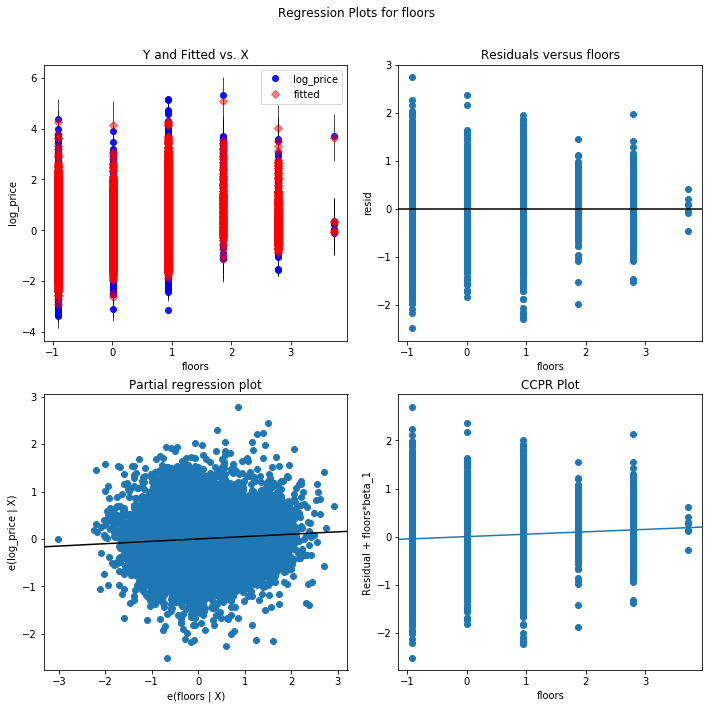

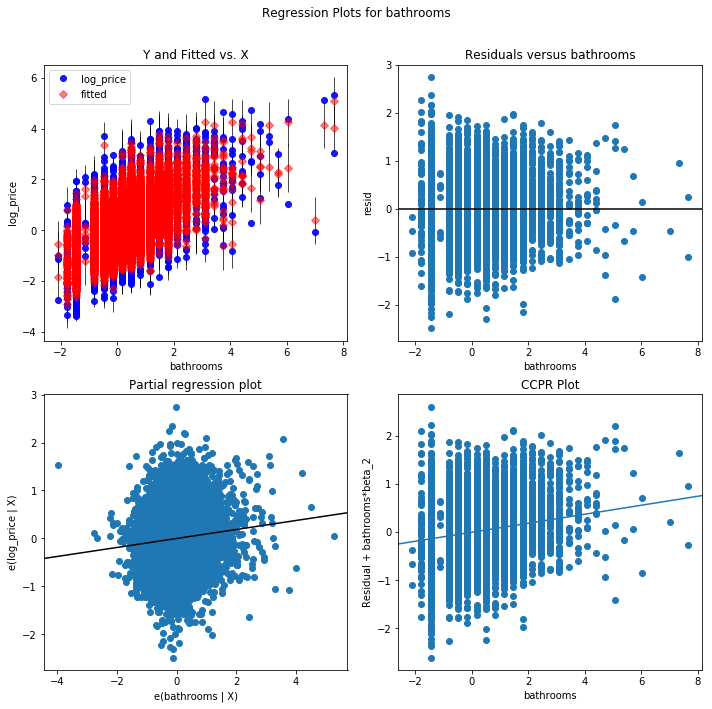

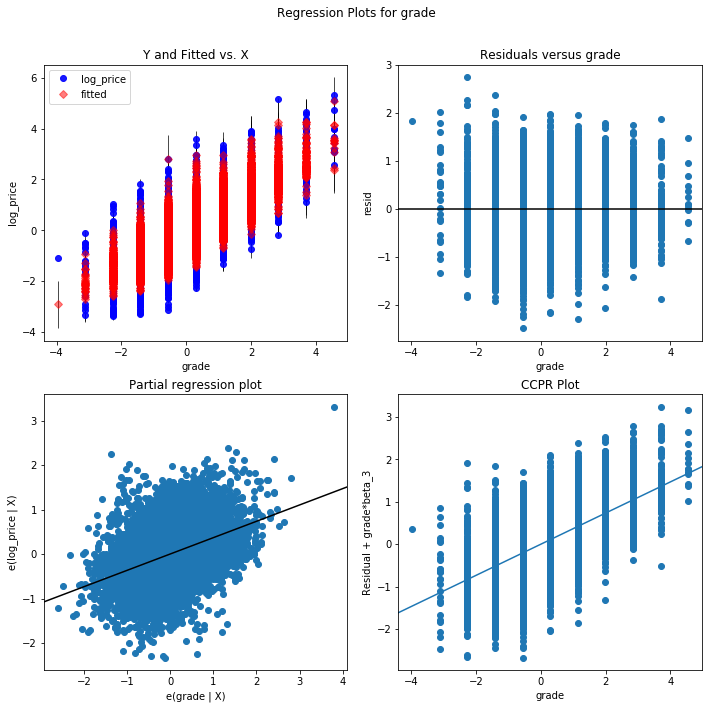

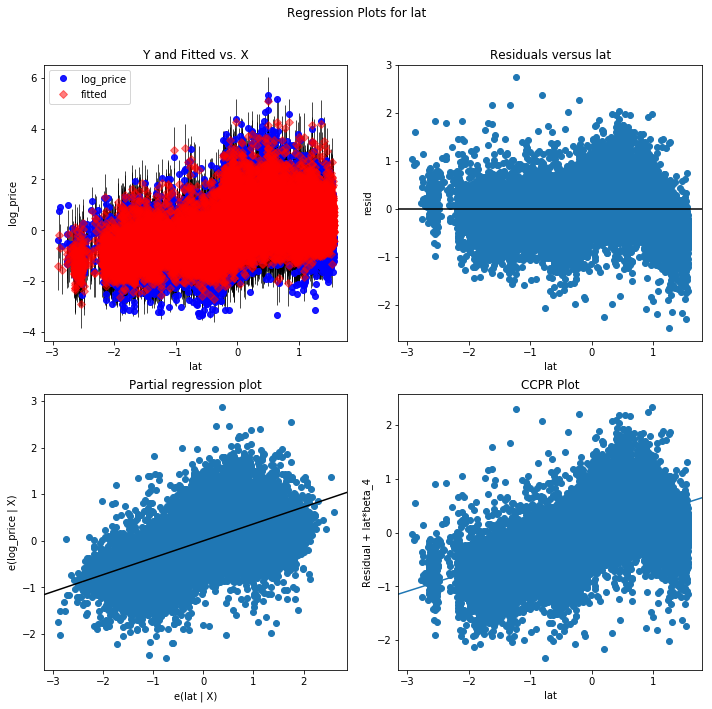

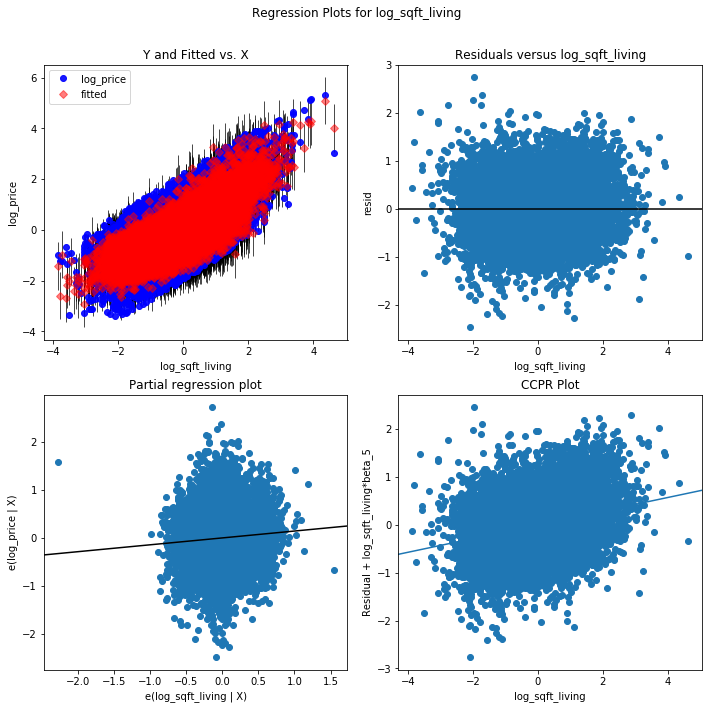

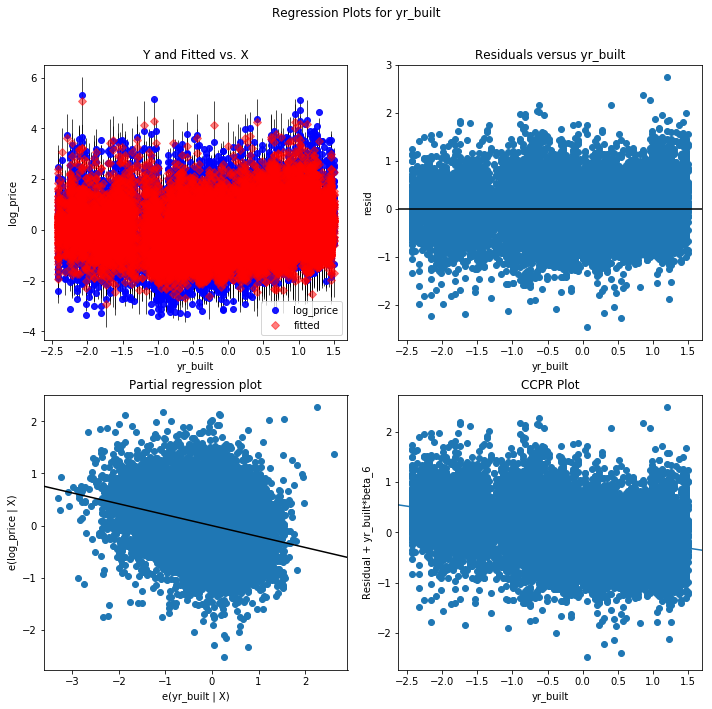

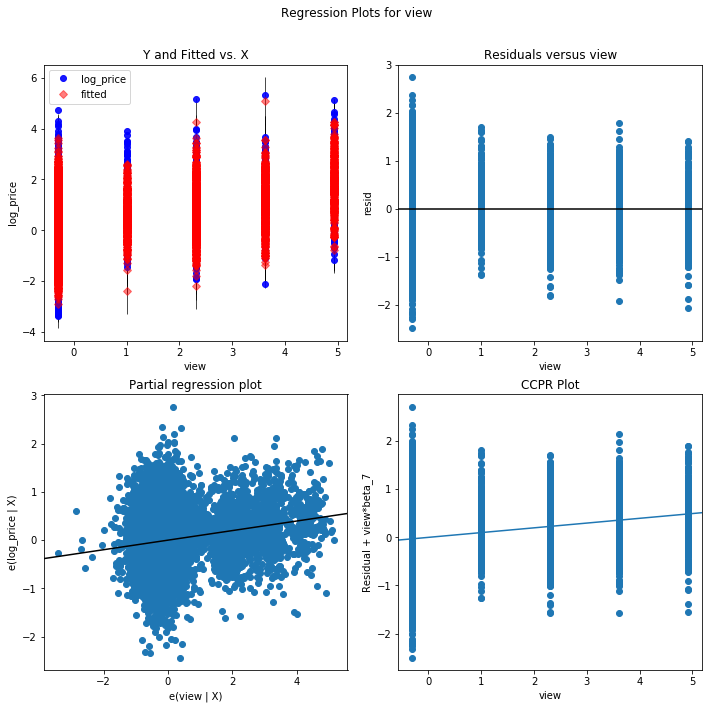

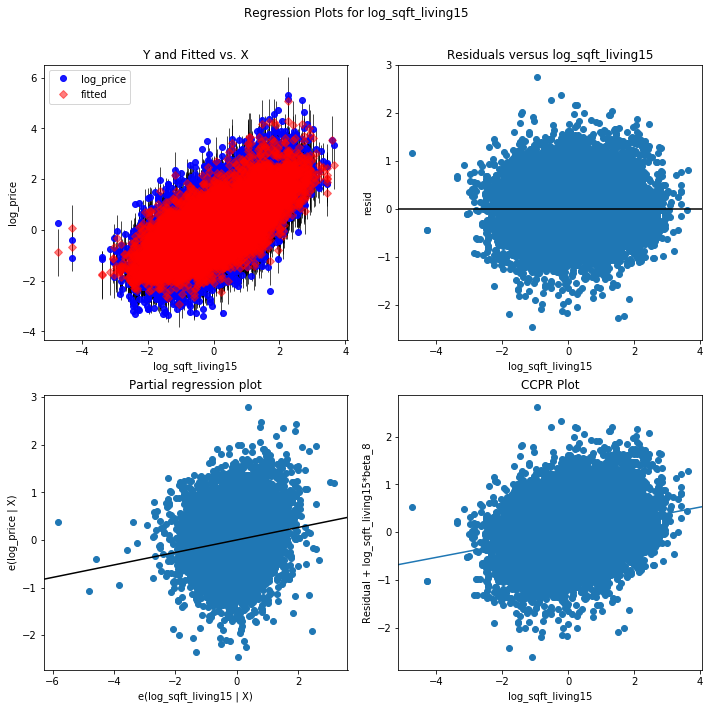

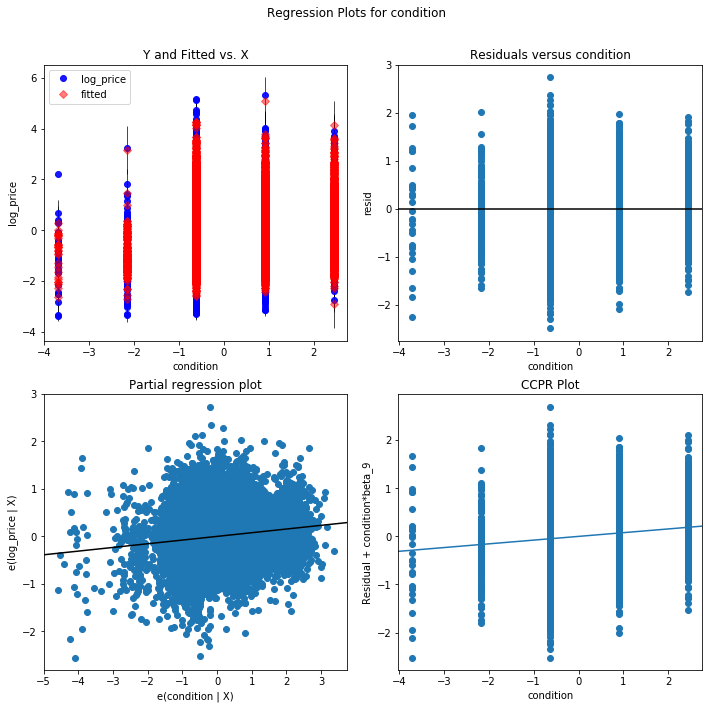

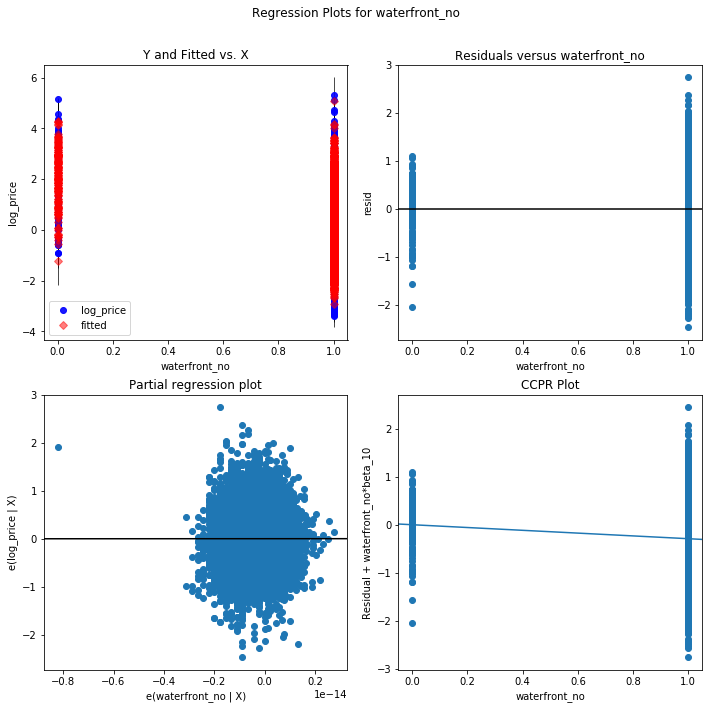

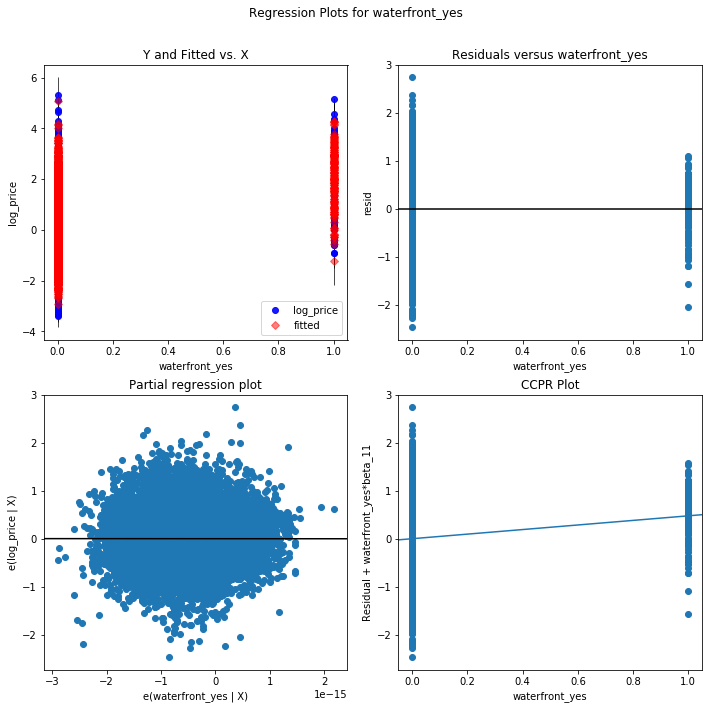

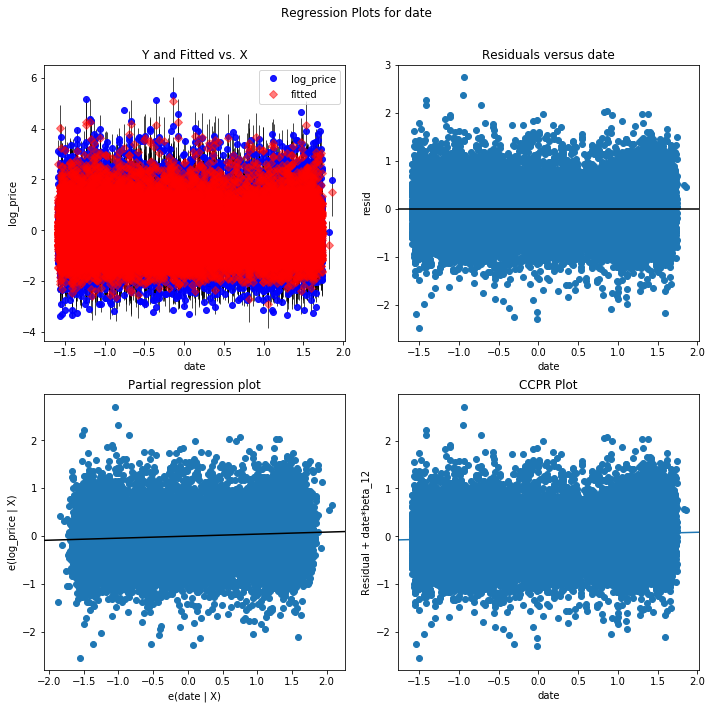

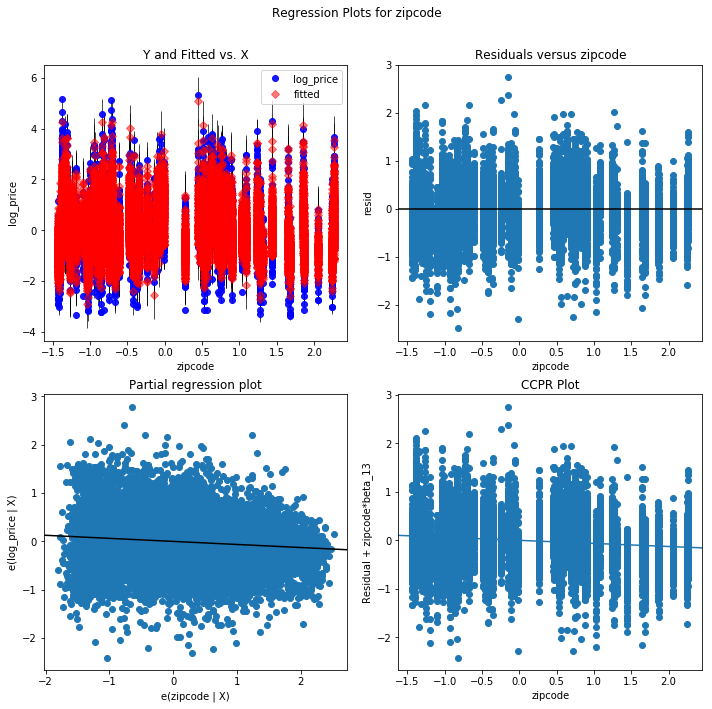

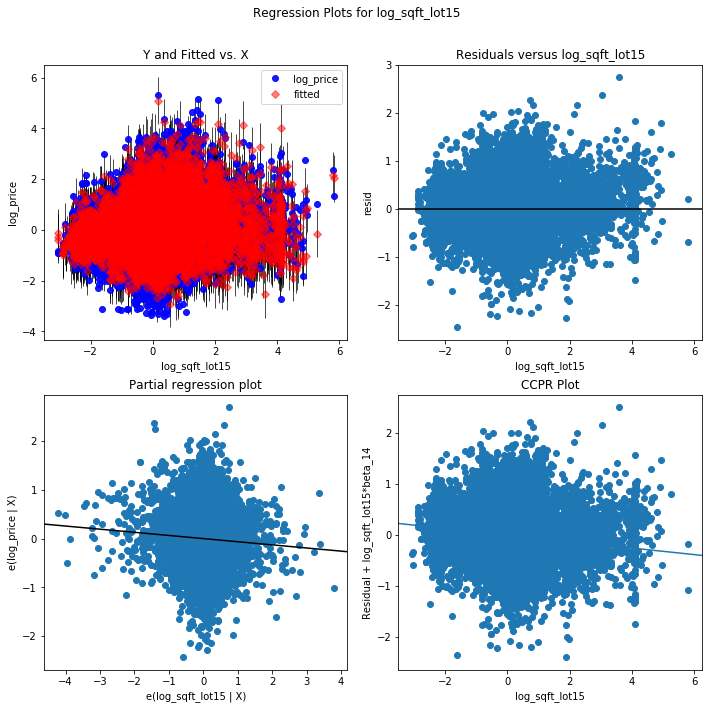

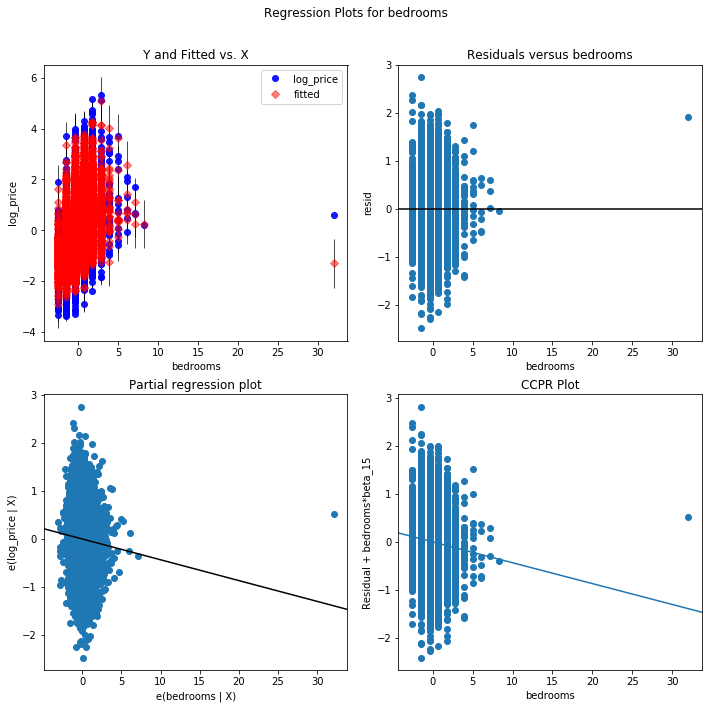

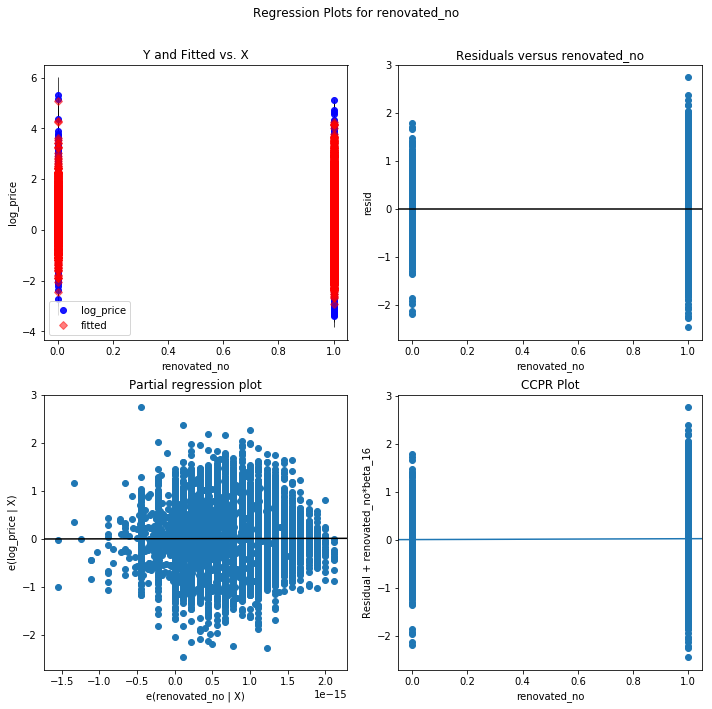

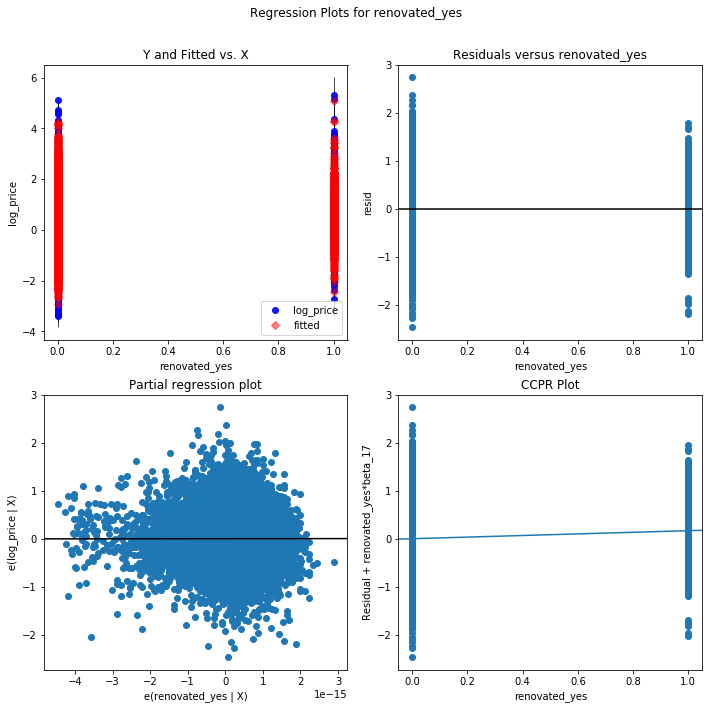

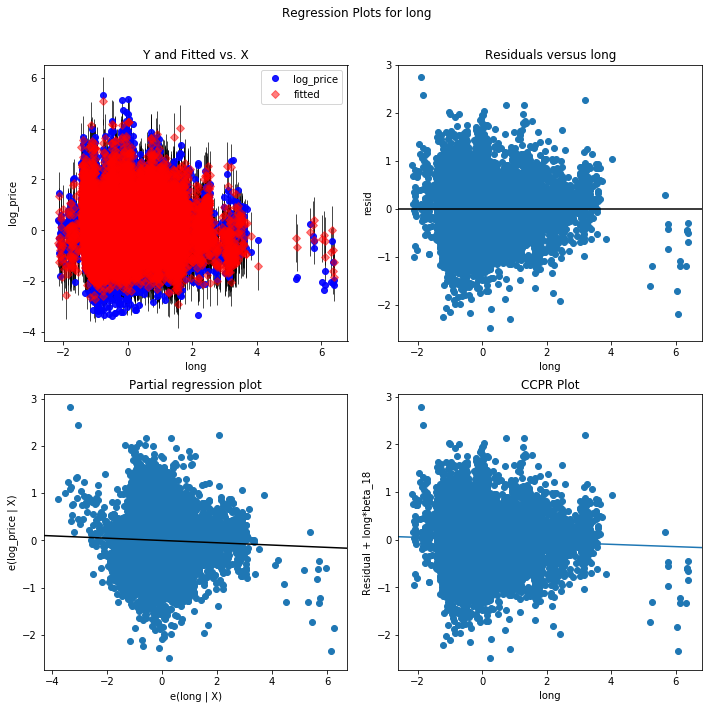

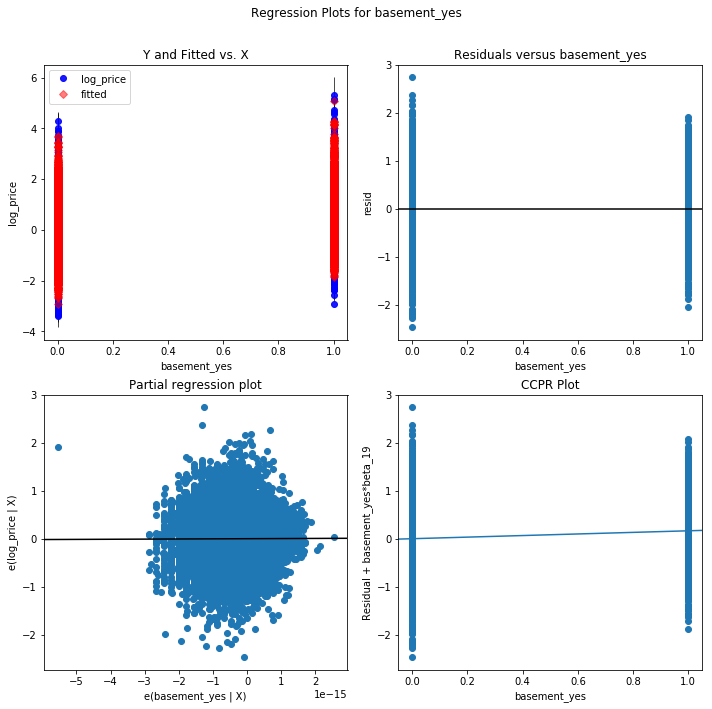

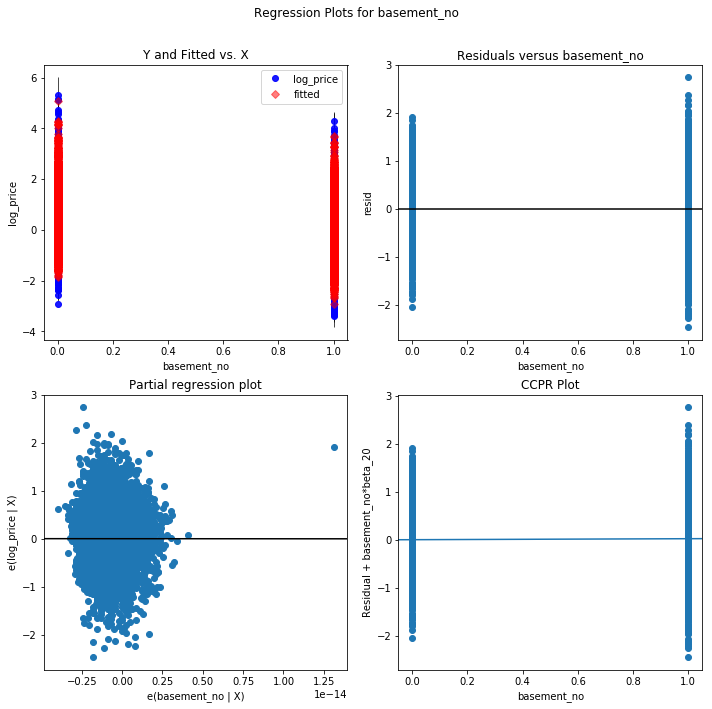

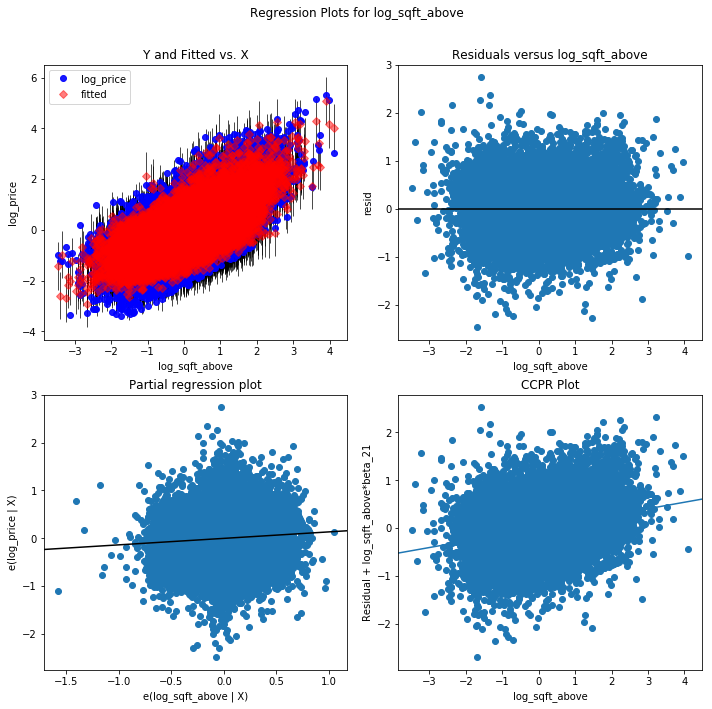

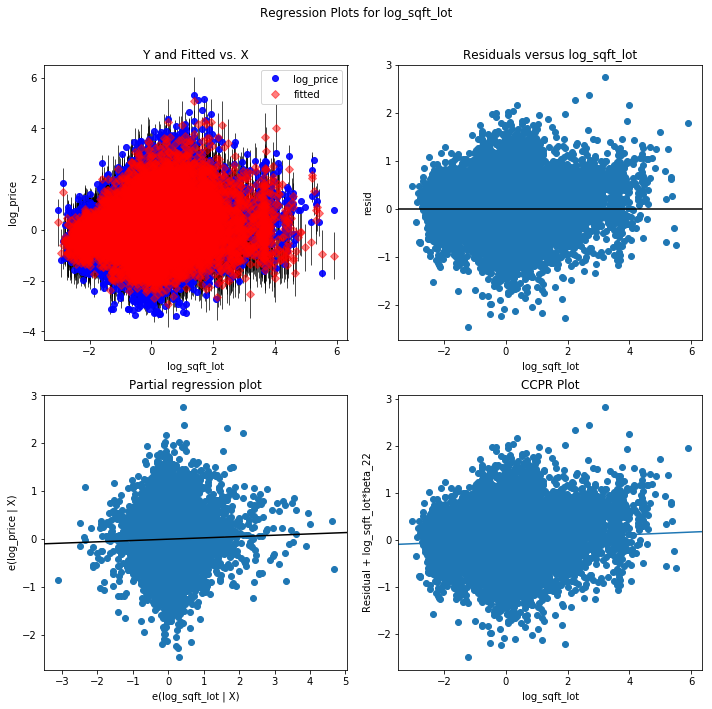

In [39]:
# Regression plots for stepwise selection model 

for feature in features3.columns:
    fig = plt.figure(figsize=(10,10))
    fig = sm.graphics.plot_regress_exog(model3, feature, fig=fig)
    plt.show()
    
    

The stepwise selection method demonstrates that our best possible model (according to adj-R^2) includes 22 features.  This model features’ variances account for almost 78% of the variance in our target variable, a vast improvement over our model where we manually selected the features.  We find that the model ‘Jarque-Bera’ statistics is at an astronomic 756.051 so the stepwise model fails the normality assumption.  Additionally, heteroscedasticity in the residuals was present in ten of this model’s features (**‘bathrooms’**, **‘lat’**, **‘condition’**, **‘waterfront_yes’**, **‘waterfront_no’**, **‘floors’**, **‘bedrooms**’, **'renovated_yes'**, **‘long’**, and **‘renovated_no’**).  While this model’s coefficient of determination suggests that this is a better performing model, it’s reliability is severely limited by the presence of non-linearity/multicollinearity, non-normality, and heteroscedasticity.


In [40]:
# Model3 coefficients sorted by magnitude
coef3 = pd.DataFrame(model3.params, columns=['coef'])

coef3.loc[coef3['coef']>0,'corr'] = '+'
coef3.loc[coef3['coef']<0,'corr'] = '-'
coef3.loc[coef3['coef']==0,'corr'] = '0'

coef3['coef'] = coef3['coef'].abs()

coef3.loc[coef3['coef']>=0.30,'tier'] = 'A'
coef3.loc[(coef3['coef']<0.30) & (coef3['coef']>=0.20),'tier'] = 'B'
coef3.loc[(coef3['coef']<0.20) & (coef3['coef']>=0.10),'tier'] = 'C'
coef3.loc[coef3['coef']<0.10,'tier'] = 'D'

coef3.sort_values(by='coef', ascending=False)


coef corr tier
waterfront_yes     0.476850    +    A
grade              0.367568    +    A
lat                0.363077    +    A
waterfront_no      0.291357    -    B
yr_built           0.209006    -    B
const              0.185493    +    C
renovated_yes      0.167186    +    C
basement_yes       0.164793    +    C
log_sqft_living    0.143362    +    C
log_sqft_above     0.135246    +    C
log_sqft_living15  0.131301    +    C
view               0.098990    +    D
bathrooms          0.093693    +    D
condition          0.077579    +    D
log_sqft_lot15     0.064284    -    D
zipcode            0.063321    -    D
floors             0.050063    +    D
bedrooms           0.043345    -    D
date               0.042315    +    D
log_sqft_lot       0.027476    +    D
long               0.024292    -    D
basement_no        0.020700    +    D
renovated_no       0.018307    +    D

We sorted the features' coefficients by magnitude as a way to crudely rank each feature's 'effect' on the target variable.  We have to remember that linear regression measures correlation (not causation!) and so we must be cautious with the word 'effect'.  A larger coefficient indicates that the target changes by a greater amount for a given change in a feature.  Accordingly, the model's 21 included features belong to four tiers (A-D, cutoffs were arbitrarily selected).  Members of the 'A' and 'B' tier are the features where their changes are associated with the greatest change in **'log_price'**. 

The model suggests that home values in King County are tied strongest to whether or not it is on the water, the level of construction/design, and its latitude (north is better). The year a home is built, whether or not it has been renovated or has a basement, and the footage of its and its neighbors' living areas are also tied to home values although not as strongly. It may be more interesting to frame the feature coefficient values in terms of real world numbers. After undoing our feature transformation and scaling efforts, we found that our model suggested the following...
1. We can expect a home value increase of 130,000 dollars for being waterfront and 40,000  dollars for having been renovated.
2. For every construction grade increase of one, we can expect a home value increase of 75,000 dollars.
3. For every half degree increase in latitude, home values increase by 100,000 dollars.
4. Home values increase by 5,000 dollars for every footage increase of 100 sqft. 

##### Some Interesting Things to Note (in this model)...
- Home values are negatively correlated with its number of bedrooms but not bathrooms!
- Home values are correlated to zipcode!
- Home values are negatively correlated to the average size of its neighbors' lots! ...maybe not unexpected as urban properties probably are more highly valued and large urban properties are more rare than rural ones.
- HOWEVER, home values are positively correlated with the size of its own lot!
- Somehow (and nonsensically), having a basement and not having a basement are both correlated with increased home values (although having basement is associated with a greater increase in value).


#### Train - Test - Split and Cross Validation

In [41]:
#Test-Train_split and KFold cross validation for manually selected model v2 

X_train, X_test, y_train, y_test = train_test_split(features1, scaled_logkc_df['log_price'],
                                                   test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

linreg = LinearRegression().fit(features1, scaled_logkc_df['log_price'])

mean_mse = np.mean(cross_val_score(linreg, features1, scaled_logkc_df['log_price'], cv=5, scoring='neg_mean_squared_error'))

train_mse,test_mse,mean_mse

(0.4737898179870093, 0.4583635771539885, -0.47144167410734683)

In [42]:
#Test-Train_split and KFold cross validation for stepwise selected model

X_train, X_test, y_train, y_test = train_test_split(features3, scaled_logkc_df['log_price'],
                                                   test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

linreg = LinearRegression().fit(features3, scaled_logkc_df['log_price'])

mean_mse = np.mean(cross_val_score(linreg, features3, scaled_logkc_df['log_price'], cv=5, scoring='neg_mean_squared_error'))

train_mse,test_mse,mean_mse

(0.22584577372175405, 0.22174411807495967, -0.2276448294486189)

To finish, we will compare the two constructed models performance by cross validating them.  *Cross validation* involves splitting the data into a specified number of folds and testing the model on each fold after training it on the rest of folds.  The process returns in the mean squared error of each fold.  A smaller MSE indicates a more accurate model and the more consistent MSE between the folds indicates a well-fit model.  The stepwise model has a smaller average MSE and is a better predictor of the target variable -- ‘log_price than the manually selected model.  